# Downsizing big gov from the inside:
## Exploring reasons public servants resign in Australia

![banner](https://truthout.org/app/uploads/2017/12/Which-Is-Worse-Government-or-Corporate-Bureaucracy.jpg)

## Abstract

In this project we look into what drives public servants from 2 different government bodies to resign. We find that:

1. both staffs are very experienced and old in general, while younger/newer employees are over-represented in resignation numbers.
2. all resignations took place within 4 years or less, indicating an abrupt change in policy might be to blame.

Digging deeper, we group our data according to age and experience in both institutes, and come up with the following findings:

<table ><tr><th > by/dataset <th><th> TAFE <th> DETE<tr><tr>
<tr><td> AGE <td><td> Leading factor: move to private sector (15%-43%); 
    also: job dissatisfaction (10%-20%); 
    high inter-confl at 37 18%; 
    high public move at 43 24%. <td><td>Main: move to private main cause for 26-50 (20%-42%);
    relocation always a main concern, top issue for 23, 33, and 61yo (27%-35%); 
    work-life balance: most important 41-60, in tops-of-mind for 23yo (always +20%)<td><tr><tr>
<tr><td> XP <td><td>Leading factor: move to private, 27%-43%;
    2nd most important: job dissatisfaction 17%-24%; 
    move to public career and dissatisfaction make the top 4.<td><td>Most important: work-life balance(15%-30%), move to private sector (8%-30%);
    relocation is a big problem in the first 6 years (15%-35%);
    job dissatisfaction also high in the charts (10-20%), except for the 1-2 years group;<td><tr><table>

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>


Urbanization is the phenomenon observed in the 20th century where population concentrated heavily in cities comming from the countryside. There are many consequences to this shift to our natural way of life, where we went from subsistence work on farms to generating and aggregating value by working in factories and offices.

The exception to that are public servants, hired by governments to deal with bureaucracy: despite not generating any profit, they usually do the work needed to keep the machinery running, and is usually seen as necessary. The tradeoff for lack of innovation and excitation is usually stability in the job "to resist political changes" that might occur and keep the workflow going. 

Being able to identify job dissatisfaction indicators can lead to optimizing moves by employers to retain the best workers. It is actually very profitable for both ends of the bargain: less disputes, more stability, planning capacity, followed by a better reputation overall.

In this project, our task is to look into datasets from two different governmental bodies in Australia and analyze what is driving employees to resign.

## 2. Goals and limitations<a name="section2"></a>

We will look into the [Department of Education, Training and Employment (DETE)](https://www.data.qld.gov.au/dataset/employee-exit-survey-dete) and Techinical and Further Education Institute (TAFE) in Queensland, Australia- which has been erased, only available through DQ courses- to determine indicators of what drives employees to quit. Specifically, to which extent is employee dissatisfaction a factor for resignation among two opposing group pairs: 

1. recently-accepted vs. in-house veterans;
2. young vs. old employees.

Limitations:

1. Despite similar, the questionnaires don't actually have the exact same questions, which limits our capacity to contrast datasets;
2. The number of possible variables that factor in staff's decision is too big, so we decide to only consider the official factors suggested by each table. Thus, we drop subjective answers that are contained in both datasets, attaining ourselves to the 'contributing factors' columns.

## 3. Methodology<a name="section3"></a>

We'll analyze both datasets with the aid of pandas DataFrames, matplotlib and seaborn visualizations. Our strategy will be to scan the data grouping by age and experience for the whole institute and compare to their respective representations within the resigning staff group. 

We'll then procede to analyze the contributing factors when grouped by age and experience for both institutes, enabling comparisons between traits and trends.

## 4. Metadata<a name="section4"></a>

No data dictionary was not provided with the dataset. We'll then dispose of general knowledge to name the columns. Below is a preview of some columns from dete_survey.csv, which contains 56 rows and 822 entries:

* ID: Used to identify the participant
* SeparationType: The reason for ending the employment
* Case Date: the year/month the employment ended
* DETE Start Date: The year employment began with DETE

Similar rows are shown in the preview for the TAFE dataset, which contains 702 entries for 72 columns, below:

* Record ID
* Reason for ceasing employment
* LengthofServiceOverall. Overall Length of Service at Institute (in years): Employment's length

## 5 Data Exploration and Transformation <a name="section5"></a>
### 5.1 Data exploration for DETE
* (1): Check for data type;
* (2): missing/repeated data
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
from csv import reader

plt.style.use('fivethirtyeight')
sns.set(style='darkgrid')


pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe = pd.read_csv('tafe_survey.csv')


In [2]:
#(1) Check for datatype
print(dete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [3]:
#(1) Check for datatype
dete.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,788,749.000000,724.000000,817,455,717,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,24,NaN,NaN,15,8,8,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,NaN,NaN,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,NaN,NaN,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,1994.182911,1998.955801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,13.880503,67.792281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,1982.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,1996.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,2007.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#(1) Check for datatype
dete[dete['Aboriginal'].notnull()]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
27,28,Resignation-Other employer,2012,2005.0,2011.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Permanent Full-time,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,N,A,A,A,A,A,A,A,A,A,A,A,N,N,N,A,A,A,A,A,A,Female,21-25,Yes,NaN,NaN,NaN,NaN
82,83,Voluntary Early Retirement (VER),2012,1991.0,2010.0,Deputy Principal,NaN,NaN,NaN,Permanent Full-time,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,N,N,SD,SD,A,D,SD,SD,SD,SD,SD,SD,N,SD,N,SD,SD,SD,SD,N,A,Female,51-55,Yes,NaN,NaN,NaN,NaN
113,114,Age Retirement,2012,2009.0,2009.0,Schools Officer,NaN,NaN,NaN,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,M,M,M,M,M,M,M,M,M,M,SA,M,M,A,M,SA,SA,N,SA,M,M,Male,56-60,Yes,NaN,NaN,NaN,NaN
165,166,Voluntary Early Retirement (VER),2012,2005.0,2008.0,Public Servant,AO5-AO7,Central Office,Human Resources,Permanent Full-time,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,N,D,SA,A,SA,SA,SA,SA,SA,SA,A,A,A,A,N,SA,SA,SA,SA,A,SA,Male,26-30,Yes,NaN,NaN,NaN,NaN
178,179,Voluntary Early Retirement (VER),2012,1996.0,2011.0,Public Servant,A01-A04,Central Office,Corporate Procurement,Permanent Full-time,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,A,A,A,SA,A,A,A,SA,SA,A,N,A,A,A,A,A,A,A,A,A,A,Male,41-45,Yes,NaN,NaN,NaN,NaN
189,190,Resignation-Other employer,2012,2006.0,2007.0,Public Servant,AO8 and Above,Central Office,Other,Permanent Full-time,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,SA,SA,SA,SA,SA,N,A,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,Female,41-45,Yes,NaN,NaN,NaN,NaN
249,250,Contract Expired,2012,2011.0,2012.0,Teacher Aide,NaN,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,D,A,N,A,A,A,A,A,A,A,N,N,N,N,A,A,A,N,A,A,Female,46-50,Yes,NaN,NaN,NaN,NaN
264,265,Resignation-Other reasons,2012,2011.0,2011.0,School Administrative Staff,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,20 or younger,Yes,NaN,NaN,NaN,NaN
447,448,Termination,2012,2010.0,2010.0,Public Servant,AO8 and Above,Central Office,Information and Technologies,Temporary Full-time,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,A,A,A,A,A,SA,A,SA,SA,A,SA,SA,A,A,N,N,N,A,Male,31-35,Yes,NaN,NaN,NaN,NaN
479,480,Resignation-Other reasons,2013,2013.0,2013.0,Teacher,Primary,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,N,N,SA,N,SA,N,N,SA,SA,N,N,NaN,NaN,NaN,NaN,SA,SA,SA,SA,NaN,NaN,Female,26-30,Yes,NaN,NaN,NaN,NaN


From 'Professional Development' to 'Health & Safety', the data types are objects, but they are actually variables of ordinal scale answering 'how much do you agree?' and could be replaced by something easier, say, integers 1-5.

'Cease Date', 'DETE Start Date', 'Role Start Date' should be integers for years.

'Age' should be an integer, and the last 5 columns should be booleans.

Instead of 'Gender', we can rename the column as 'Female', so it becomes a boolean.

In [5]:
#1. Check for data types
#From 'Professional Development' to 'Health & Safety' could be replaced by integers -2:2.
agree_cols = list(dete.loc[:, 'Professional Development':'Health & Safety'].columns)

In [6]:
dete_agree=dete.copy()
agree_dict = {
    'SA':1,
    'A':0.5,
    'N':0,
    'D':-0.5,
    'SD':-1,
    'M':np.nan
}

for col in agree_cols:
    dete_agree[col]=dete_agree[col].map(agree_dict)

In [7]:
for col in agree_cols:
    print(dete_agree[col].value_counts(dropna=False))
    print('---')

 0.5    413
 1.0    184
 0.0    103
-0.5     60
-1.0     33
 NaN     29
Name: Professional Development, dtype: int64
---
 0.5    242
 0.0    230
 NaN    111
 1.0    100
-0.5     83
-1.0     56
Name: Opportunities for promotion, dtype: int64
---
 0.5    335
 0.0    158
 1.0    121
-0.5    112
-1.0     77
 NaN     19
Name: Staff morale, dtype: int64
---
 0.5    357
 0.0    160
 1.0    115
-0.5     77
-1.0     65
 NaN     48
Name: Workplace issue, dtype: int64
---
 0.5    467
 1.0    148
 0.0     99
-0.5     61
-1.0     27
 NaN     20
Name: Physical environment, dtype: int64
---
 0.5    359
 1.0    162
 0.0    116
-0.5    107
-1.0     59
 NaN     19
Name: Worklife balance, dtype: int64
---
 0.5    342
 0.0    168
 1.0    124
-0.5     95
-1.0     67
 NaN     26
Name: Stress and pressure support, dtype: int64
---
 0.5    349
 1.0    179
 0.0    120
-0.5     77
-1.0     76
 NaN     21
Name: Performance of supervisor, dtype: int64
---
 0.5    401
 1.0    243
 0.0     95
-0.5     37
-1.0     2

In [8]:
#1. Check for data types
#From 'Professional Development' to 'Health & Safety' could be replaced by integers -2:2.
dete_agree.loc[:, 'Professional Development':'Health & Safety']

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,0.5,0.5,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.0
1,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.5
4,0.5,0.5,0.0,0.0,-0.5,-0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,-0.5,-0.5,0.5,0.0,0.5,NaN
5,-1.0,-1.0,-1.0,-0.5,-1.0,-0.5,-0.5,0.5,NaN,1.0,0.5,0.5,0.0,0.0,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,NaN
6,-1.0,0.0,-1.0,-0.5,0.5,0.5,-0.5,-0.5,1.0,-0.5,0.0,0.0,-0.5,-0.5,0.0,0.0,-0.5,-0.5,-0.5,-0.5,-1.0
7,0.5,NaN,0.5,0.5,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,NaN,0.5,0.0,0.5,1.0,0.5,1.0,NaN,1.0
8,-0.5,0.0,-0.5,-0.5,0.0,-1.0,-1.0,-0.5,-0.5,0.0,0.5,NaN,-1.0,-1.0,0.0,-0.5,-1.0,-0.5,0.5,-0.5,0.0
9,-1.0,-1.0,-1.0,-1.0,0.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
#1 check for data types
# 'Age' should be an integer
dete_agree['Age'].unique()

array(['56-60', '61 or older', '36-40', '41-45', '31-35', '46-50',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

In [10]:
#1 check for data types
# 'Age' should be an integer
dete_age=dete_agree.copy()
age_dict = {
    '56-60':58,
    '61 or older':61,
    '36-40':38,
    '41-45':43,
    '31-35':33,
    '46-50':48,
    '51-55':53,
    '21-25':23,
    '26-30':28,
    '20 or younger':20
}

dete_age['Age']=dete_age['Age'].map(age_dict)

In [11]:
#1. check for data types
#the last 5 columns should be booleans.
dete_bool = dete_age.copy()
bool_dict = {'Yes':True}
bool_cols = list(dete_bool.iloc[:,-5:].columns)

for c in bool_cols:
    dete_bool[c] = dete_bool[c]=='Yes'


In [12]:
#(1) Check for datatype 
#'Cease Date', 'DETE Start Date', 'Role Start Date' should all be integers
date_cols = ['Cease Date', 'DETE Start Date', 'Role Start Date']
dete_date = dete_bool.copy()
for t in date_cols:
    print(dete_date[t].unique())
    print('---')

['08/2012' '05/2012' '07/2012' '2012' '2013' '2014' '2010' '09/2013'
 '07/2013' '08/2013' '06/2013' '04/2013' '05/2013' '09/2010' '01/2014'
 '11/2012' '04/2014' '12/2013' '07/2014' '10/2013' '11/2013' nan '09/2014'
 '07/2006' '02/2014']
---
[1984.   nan 2011. 2005. 1970. 1994. 1972. 1988. 2009. 1997. 1999. 1998.
 1967. 2007. 1995. 1996. 2006. 1989. 1982. 1980. 1973. 1981. 1974. 1975.
 1978. 2003. 2000. 1977. 1976. 1985. 2008. 1963. 1993. 1979. 1990. 1969.
 1966. 2010. 1968. 1991. 1971. 2002. 1986. 2004. 2012. 1983. 2001. 1987.
 1992. 2013. 1965.]
---
[2004.   nan 2011. 2006. 1989. 1997. 2007. 1990. 2009. 2008. 1999. 1998.
 2000. 2010. 1996. 1982. 2012. 1981. 2002. 1977. 2003. 1978. 1992. 1980.
 1994. 1976. 1991. 2001. 1993. 1983. 1987. 1985. 1975. 1986. 1979. 1988.
 2005. 1995. 1970. 1984.  200. 1974. 2013. 1971. 1973. 1972.]
---


In [13]:
pattern=r"([1-2][0-9]{3})"
dete_date['Cease Date'] = dete_date['Cease Date'].str.extract(pattern).fillna(0).astype(int)
dete_date['Cease Date'].replace({0: np.nan}, inplace=True)

In [14]:
dete_date['Role Start Date']=dete_date['Role Start Date'].fillna(0).astype(int)

In [15]:
dete_date['DETE Start Date']=dete_date['DETE Start Date'].fillna(0).astype(int)

In [16]:
#(1) Check for datatype 
#'Cease Date', 'DETE Start Date', 'Role Start Date' should be integers
dete_date['Role Start Date'] = dete_date['Role Start Date'].replace({200:np.nan, 0:np.nan})
#'DETE Start Date'
dete_date['DETE Start Date'] = dete_date['DETE Start Date'].replace({0:np.nan})

In [17]:
dete_date[['Cease Date', 'DETE Start Date', 'Role Start Date']].describe(include='all')

,Cease Date,DETE Start Date,Role Start Date
count,788.000000,749.000000,723.000000
mean,2012.598985,1994.182911,2001.443983
std,0.662366,13.880503,10.659713
min,2006.000000,1963.000000,1970.000000
25%,2012.000000,1982.000000,1995.000000
50%,2013.000000,1996.000000,2005.000000
75%,2013.000000,2007.000000,2010.000000
max,2014.000000,2013.000000,2013.000000


In [18]:
#1 check for data types
#Instead of 'Gender', we can switch to 'Male' and it becomes a boolean.
dete_date['Gender'].value_counts(dropna=False)

Female    573
Male      225
NaN        24
Name: Gender, dtype: int64

In [19]:
#1 check for data types
#Instead of 'Gender', we can switch to 'Female' and it becomes a boolean.
dete_female = dete_date.copy()
dete_female=dete_female.rename(columns={'Gender': 'Female'})
dete_female['Female'].replace({'Male': False, 'Female':True}, inplace=True)
dete_female['Female'] = dete_female['Female'].astype(bool)

In [20]:
#1 check for data types
#Instead of 'Gender', we can switch to 'Female' and it becomes a boolean.
dete_female['Female'].value_counts(dropna=False)

True     597
False    225
Name: Female, dtype: int64

After completing our data type transformations, we move to missing and repeated values

Text(0.5, 0.8499999999999819, 'Columns')

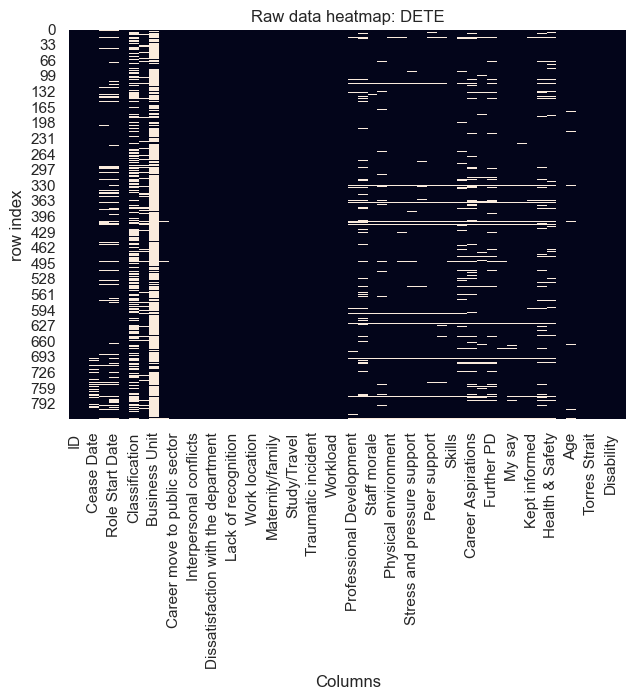

In [21]:
#(2): missing/repeated data
sns.heatmap(dete_female.isnull(), cbar=False)
plt.title('Raw data heatmap: DETE')
plt.ylabel('row index')
plt.xlabel('Columns')

We have to filter our data exclusively for entries with a 'Cease Date'

In [22]:
dete_cease = dete_female[dete_female['Cease Date'].notnull()]

We can see that the vast majority of terminations occured either in 2012 or 2013.

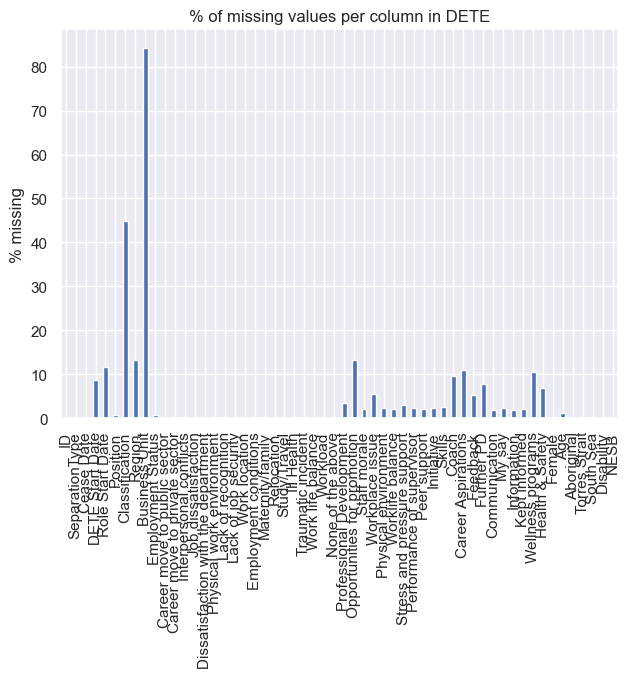

In [23]:
#(2): missing/repeated data
pct_miss=dict()
for c in list(dete_cease.columns):
    missing = round((dete_cease[c].isna().sum())/(len(dete_cease))*100, 2)
    #print(c+': ' + str(missing))
    pct_miss[c]=missing
    
missing_series = pd.Series(pct_miss)
missing_series.plot.bar()
plt.title('% of missing values per column in DETE')
plt.ylabel('% missing')
plt.show()

In [24]:
#(2): missing/repeated data
dete_cease['Classification'].value_counts(dropna=False)

NaN                  353
Primary              153
Secondary            120
A01-A04               60
AO5-AO7               46
Special Education     31
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [25]:
#(2): missing/repeated data
dete_cease['Business Unit'].value_counts(dropna=False)

NaN                                           664
Education Queensland                           53
Information and Technologies                   26
Other                                          11
Training and Tertiary Education Queensland     11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Corporate Procurement                           1
Finance                                         1
Pacific Pines SHS                               1
Calliope State School                           1
Indigenous Education and Training Futures       1
Name: Business Unit, dtype: int64

In analyzing missing data, 'Business Unit' and 'Classification' stand out from the rest, with 45% and 84% of missing values. It is hard to make sense of the 'Classification' column, whereas the business column won't probably yield any insights given how much data is missing. We can drop both of them.

In [26]:
#(2): missing/repeated data
dete_drop = dete_cease.drop(['Business Unit','Classification'], axis=1)

In [27]:
#(2): missing/repeated data
#dete_updated=dete_cease.copy()
duplicates_dete = dete_drop.duplicated()
duplicates_dete.sum()

0

There seems to be no repeated data in the dete dataset.

In [28]:
dete_updated = dete_drop.copy()
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace('/', '_')
final_name = {'separationtype':'resignation'}
dete_updated.rename(final_name, axis=1, inplace=True)

In [29]:
#1 Data type
# study only resignations, but we can keep all non-resignation data to enable correlation tables between variables
dete_updated['resignation'].value_counts(normalize=True, dropna=False)

Age Retirement                          0.342640
Resignation-Other reasons               0.184010
Resignation-Other employer              0.110406
Resignation-Move overseas/interstate    0.086294
Voluntary Early Retirement (VER)        0.083756
Ill Health Retirement                   0.076142
Other                                   0.059645
Contract Expired                        0.038071
Termination                             0.019036
Name: resignation, dtype: float64

We are only interested in data from resigning employees:

In [30]:
#    'Less than 1 year': 0,
#     '1-2': 1,
#     '3-4':3,
#     '5-6': 5,
#     '7-10': 7,
#     '11-20': 11,
#     'More than 20 years': 20,

dete_updated['years_institute_service'] = dete_updated['cease_date']-dete_updated['dete_start_date']
dete_up2 = dete_updated.copy()
dete_up2.loc[dete_up2['years_institute_service']>19, 'years_institute_service']=20
dete_up2.loc[(dete_up2['years_institute_service']<20)&(dete_up2['years_institute_service']>10), 'years_institute_service']=11
dete_up2.loc[(dete_up2['years_institute_service']<11)&(dete_up2['years_institute_service']>6), 'years_institute_service']=7
dete_up2.loc[(dete_up2['years_institute_service']<7)&(dete_up2['years_institute_service']>4), 'years_institute_service']=5
dete_up2.loc[(dete_up2['years_institute_service']<5)&(dete_up2['years_institute_service']>2), 'years_institute_service']=3
dete_up2.loc[(dete_up2['years_institute_service']<3)&(dete_up2['years_institute_service']>0), 'years_institute_service']=1
print(dete_up2['years_institute_service'].value_counts(dropna=False))

20.0    313
11.0    132
NaN      69
7.0      64
5.0      61
1.0      59
3.0      59
0.0      31
Name: years_institute_service, dtype: int64


In [31]:
pattern=r'Resignation'
dete_final = dete_up2.copy()
dete_final['resignation'] = dete_final['resignation'].str.contains(pattern, na=False)
dete_resign = (dete_final[dete_final['resignation']==True]).copy()
dete_final['resignation'].value_counts(dropna=False)

False    488
True     300
Name: resignation, dtype: int64

In [32]:
dete_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 821
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   788 non-null    int64  
 1   resignation                          788 non-null    bool   
 2   cease_date                           788 non-null    float64
 3   dete_start_date                      719 non-null    float64
 4   role_start_date                      696 non-null    float64
 5   position                             783 non-null    object 
 6   region                               684 non-null    object 
 7   employment_status                    783 non-null    object 
 8   career_move_to_public_sector         788 non-null    bool   
 9   career_move_to_private_sector        788 non-null    bool   
 10  interpersonal_conflicts              788 non-null    bool   
 11  job_dissatisfaction             

In [33]:
factors_dete_dict = {'career_move_to_public_sector':'cf_move_public',
 'career_move_to_private_sector':'cf_move_private',
 'interpersonal_conflicts':'cf_interp_conflicts',
 'job_dissatisfaction':'cf_job_dissatif',
 'dissatisfaction_with_the_department':'cf_depart_dissatif',
 'physical_work_environment': 'cf_work_env_dissatif',
 'lack_of_recognition':'cf_no_recognition',
 'lack_of_job_security': 'cf_no_job_sec',
 'work_location': 'cf_bad_location',
 'employment_conditions': 'cf_dissatif',
 'maternity_family':'cf_mater/fam',
 'relocation':'cf_relocation',
 'study_travel': 'cf_study_travel',
 'ill_health': 'cf_ill',
 'traumatic_incident': 'cf_trauma',
 'work_life_balance': 'cf_balance',
 'workload':'cf_workload',
 'none_of_the_above':'cf_none_above'}

factors_dete = ['cf_move_public',
 'cf_move_private',
 'cf_interp_conflicts',
 'cf_job_dissatif',
 'cf_depart_dissatif',
  'cf_work_env_dissatif',
 'cf_no_recognition',
  'cf_no_job_sec',
  'cf_bad_location',
  'cf_dissatif',
 'cf_mater/fam',
 'cf_relocation',
  'cf_study_travel',
  'cf_ill',
  'cf_trauma',
  'cf_balance',
 'cf_workload',
 'cf_none_above']
    
dete_resign.rename(factors_dete_dict, axis=1, inplace=True)
dete_resign_factors = dete_resign.iloc[:, [2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,48,54]]
dete_resign_factors
# tafe_resign.rename(factors_dict, axis=1, inplace=True)

# tafe_resign = tafe_resign.iloc[:, [5,6,7,8,9,10,11,12,13,14,15,16,67,70]]
# tafe_resign

,cease_date,cf_move_public,cf_move_private,cf_interp_conflicts,cf_job_dissatif,cf_depart_dissatif,cf_work_env_dissatif,cf_no_recognition,cf_no_job_sec,cf_bad_location,cf_dissatif,cf_mater/fam,cf_relocation,cf_study_travel,cf_ill,cf_trauma,cf_balance,cf_workload,cf_none_above,age,years_institute_service
3,2012.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,38.0,7.0
5,2012.0,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,43.0,11.0
8,2012.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,33.0,3.0
9,2012.0,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,48.0,11.0
11,2012.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,33.0,3.0
12,2012.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,38.0,11.0
14,2012.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,33.0,5.0
16,2012.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,61.0,NaN
20,2012.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,58.0,20.0
21,2012.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,53.0,20.0


### 5.2 Data Exploration and Transformation for TAFE

In [34]:
#1. check for data types
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [35]:
tafe.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Regarding data types, we should convert the columns into the following:

#agreeables(6): ['InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction':'WorkUnitViews. Topic:30. Staff morale was positive within my work unit'],

#booleans(yes/-): ['Induction. Did you undertake Workplace Induction?': 'Gender. What is your Gender?'],

#booleans(str/-): ['Contributing Factors. Career Move - Public Sector':'Contributing Factors. NONE']

#integer: ['CurrentAge. Current Age','LengthofServiceOverall. Overall Length of Service at Institute (in years)','LengthofServiceCurrent. Length of Service at current workplace (in years)'] 

But first, let's adapt the column names so both datasets have them identical:

In [36]:
tafe['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

We are only interested in the data for resigning employees, but let's keep the whole data and transform it into a boolean: this way we can correlate the other variables with resignation status

In [37]:
#4 unwanted rows/columns
pattern=r'Resignation'
tafe_cease = tafe.copy()
tafe_cease['Reason for ceasing employment'] = tafe['Reason for ceasing employment'].str.contains(pattern, na=False)
tafe_cease['Reason for ceasing employment'].value_counts(dropna=False)

False    362
True     340
Name: Reason for ceasing employment, dtype: int64

Text(0.5, 0.8499999999999819, 'Columns')

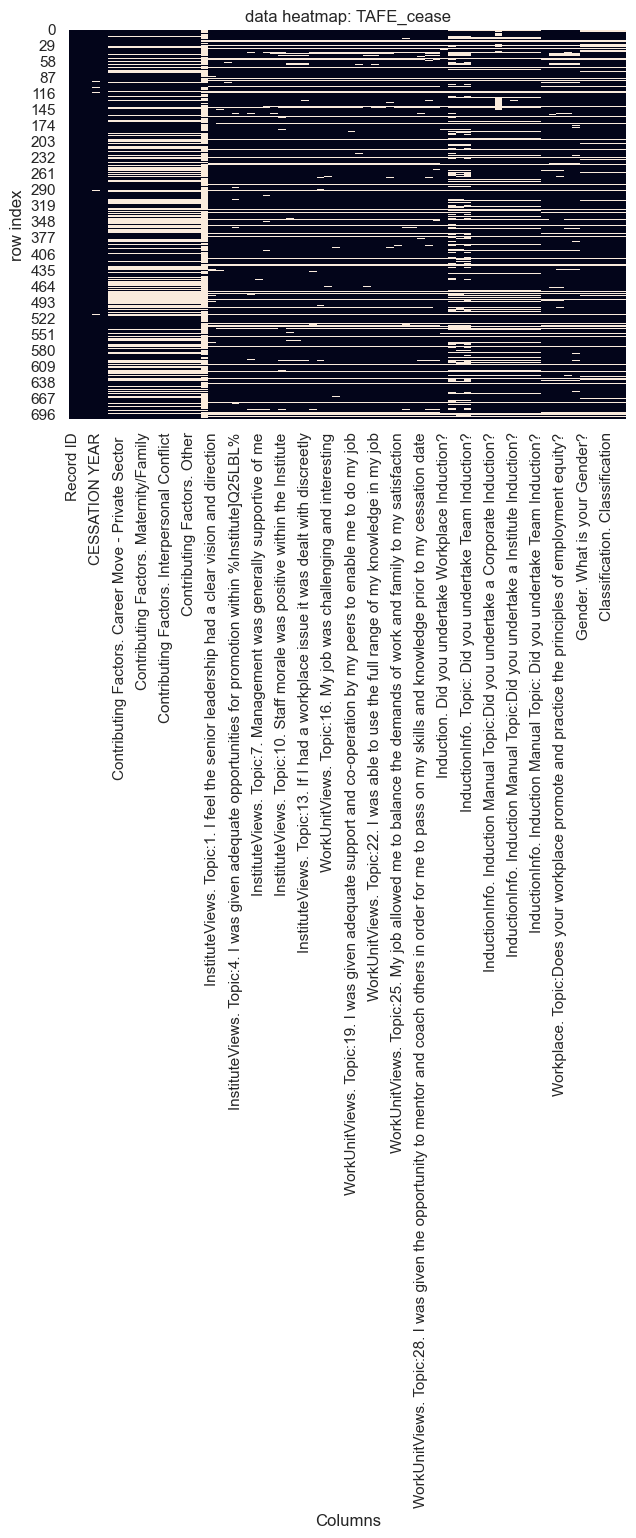

In [38]:
sns.heatmap(tafe_cease.isnull(), cbar=False)
plt.title('data heatmap: TAFE_cease')
plt.ylabel('row index')
plt.xlabel('Columns')

In [39]:
uniques = tafe_cease['InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction'].unique()
uniques

array(['Agree', 'Neutral', 'Strongly Agree', 'Disagree',
       'Strongly Disagree', nan, 'Not Applicable'], dtype=object)

In [40]:
#1 Data types/column names
tafe_agree = tafe_cease.copy()

agreeable_dict={
    'Agree': 0.5,
    'Neutral': 0,
    'Strongly Agree':1,
    'Disagree':-0.5,
    'Strongly Disagree':-1,
    'Not Applicable':7,
    np.nan: 10
}

agreeable_cols = list(tafe_agree.loc[:,'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction':'WorkUnitViews. Topic:30. Staff morale was positive within my work unit'].columns)
for col in agreeable_cols:
    print(col + ': ')   
    tafe_agree[col]=tafe_agree[col].map(agreeable_dict)
    
    tafe_agree[col] = tafe_agree[col].astype(int)
    tafe_agree[col].replace({7: np.nan, 10: np.nan}, inplace=True)
    print(tafe_agree[col].value_counts(dropna=False, normalize=True))
    print('---')



InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction: 
 0.0    0.665242
 NaN    0.141026
 1.0    0.123932
-1.0    0.069801
Name: InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction, dtype: float64
---
InstituteViews. Topic:2. I was given access to skills training to help me do my job better: 
 0.0    0.632479
 1.0    0.175214
 NaN    0.142450
-1.0    0.049858
Name: InstituteViews. Topic:2. I was given access to skills training to help me do my job better, dtype: float64
---
InstituteViews. Topic:3. I was given adequate opportunities for personal development: 
 0.0    0.623932
 1.0    0.165242
 NaN    0.149573
-1.0    0.061254
Name: InstituteViews. Topic:3. I was given adequate opportunities for personal development, dtype: float64
---
InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%: 
 0.0    0.591168
 NaN    0.206553
-1.0    0.115385
 1.0    0.086895
Name: InstituteV

 0.0    0.603989
 1.0    0.148148
 NaN    0.148148
-1.0    0.099715
Name: WorkUnitViews. Topic:30. Staff morale was positive within my work unit, dtype: float64
---


In [41]:
#1 Data types/column names
#booleans(str/-): ['Contributing Factors. Career Move - Public Sector':'Contributing Factors. NO(NE']
#booleans(str/-): iloc[5:16]

tafe_bool1 = tafe_agree.copy()
bool_ticks1 = list(tafe_bool1.columns)[5:17]
for c in bool_ticks1:
    current_str = tafe_bool1[tafe_bool1[c].str.contains(r'[a-zA-Z]')==True][c].unique()[0]
    tafe_bool1[c].replace({current_str: True, '-':False}, inplace=True)
    print(tafe_bool1[c].value_counts(dropna=False))
    print('---')
tafe_bool1[bool_ticks1] = tafe_bool1[bool_ticks1].astype(bool) 

False    375
NaN      265
True      62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64
---
False    336
NaN      265
True     101
Name: Contributing Factors. Career Move - Private Sector , dtype: int64
---
False    420
NaN      265
True      17
Name: Contributing Factors. Career Move - Self-employment, dtype: int64
---
False    403
NaN      265
True      34
Name: Contributing Factors. Ill Health, dtype: int64
---
False    411
NaN      265
True      26
Name: Contributing Factors. Maternity/Family, dtype: int64
---
False    371
NaN      265
True      66
Name: Contributing Factors. Dissatisfaction, dtype: int64
---
False    360
NaN      265
True      77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
---
False    410
NaN      265
True      27
Name: Contributing Factors. Interpersonal Conflict, dtype: int64
---
False    421
NaN      265
True      16
Name: Contributing Factors. Study, dtype: int64
---
False    415
NaN      265
True      22
Name: Contribu

* 48-51, 61-65 : Yes/No
* 6:17, 52:59 : str/- 
* 60: ??

In [42]:
#1 Data types/column names
# booleans (yes/-) ['Induction. Did you undertake Workplace Induction?': 'Gender. What is your Gender?']
print(list(tafe_bool1.columns).index('Induction. Did you undertake Workplace Induction?'))
print(list(tafe_bool1.columns).index('Gender. What is your Gender?'))


48
66


In [43]:
#1 Data types/column names
bool_ticks2 = list(tafe_bool1.columns)[52:59]
tafe_bool2 = tafe_bool1.copy()
for c in bool_ticks2:
    current_str = tafe_bool2[tafe_bool2[c].str.contains(r'[a-zA-Z]')==True][c].unique()[0]
    tafe_bool2[c].replace({current_str: True, '-':False}, inplace=True)
    print(tafe_bool2[c].value_counts(dropna=False))
    print('---')
tafe_bool2[bool_ticks2] = tafe_bool2[bool_ticks2].astype(bool) 

False    412
NaN      147
True     143
Name: InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?, dtype: int64
---
False    502
NaN      147
True      53
Name: InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?, dtype: int64
---
False    539
NaN      147
True      16
Name: InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?, dtype: int64
---
False    270
True     260
NaN      172
Name: InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?, dtype: int64
---
False    473
NaN      147
True      82
Name: InductionInfo. On-line Topic:Did you undertake a Institute Induction?, dtype: int64
---
False    518
NaN      149
True      35
Name: InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?, dtype: int64
---
False    366
True     189
NaN      147
Name: InductionInfo. Face to Face Topic: Did you undertake Team Induction

In [44]:
c = list(tafe_bool1.columns)[59]
tafe_bool2[c].replace({'-':False}, inplace=True)
print(tafe_bool2[c].value_counts(dropna=False))
tafe_bool2[c] =tafe_bool2[c].astype(bool)

False    555
NaN      147
Name: InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.], dtype: int64


In [45]:
#1 Data types/column names
tafe_bool3 = tafe_bool2.copy()
c=list(tafe_bool3.columns)[60]

current_str = tafe_bool2[tafe_bool2[c].str.contains(r'[a-zA-Z]')==True][c].unique()[0]
tafe_bool2[c].replace({current_str: True, '-':False}, inplace=True)
print(tafe_bool2[c].value_counts(dropna=False))

tafe_bool3[c] =tafe_bool3[c].astype(bool)

False    541
NaN      147
True      14
Name: InductionInfo. Induction Manual Topic: Did you undertake Team Induction?, dtype: int64


In [46]:
#1 Data types/column names
#booleans yes_no: 48-51, 
tafe_yn1 = tafe_bool3.copy()
yn1 = list(tafe_yn1.columns)[48:52]
for c in yn1:
#     current_str = tafe_yn1[tafe_yn1[c].str.contains(r'[a-zA-Z]')==True][c].unique()[0]
    tafe_yn1[c].replace({'Yes': True, 'No':False}, inplace=True)
    print(tafe_yn1[c].value_counts(dropna=False))
    print('---')
    
tafe_yn1[yn1] = tafe_yn1[yn1].astype(bool)

True     541
NaN       83
False     78
Name: Induction. Did you undertake Workplace Induction?, dtype: int64
---
NaN      270
True     232
False    200
Name: InductionInfo. Topic:Did you undertake a Corporate Induction?, dtype: int64
---
True     441
NaN      219
False     42
Name: InductionInfo. Topic:Did you undertake a Institute Induction?, dtype: int64
---
True     285
NaN      262
False    155
Name: InductionInfo. Topic: Did you undertake Team Induction?, dtype: int64
---


In [47]:

#61-65
tafe_yn2 = tafe_yn1.copy()
yn2 = list(tafe_yn2.columns)[61:66]
for c in yn2:
#     current_str = tafe_yn1[tafe_yn1[c].str.contains(r'[a-zA-Z]')==True][c].unique()[0]
    tafe_yn2[c].replace({'Yes': True, 'No':False}, inplace=True)
    print(tafe_yn2[c].value_counts(dropna=False))
    print('---')
tafe_yn2[yn2] = tafe_yn2[yn2].astype(bool)

True     382
False    226
NaN       94
Name: Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?, dtype: int64
---
True     536
NaN      108
False     58
Name: Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?, dtype: int64
---
True     512
NaN      115
False     75
Name: Workplace. Topic:Does your workplace promote and practice the principles of employment equity?, dtype: int64
---
True     488
NaN      116
False     98
Name: Workplace. Topic:Does your workplace value the diversity of its employees?, dtype: int64
---
True     416
False    165
NaN      121
Name: Workplace. Topic:Would you recommend the Institute as an employer to others?, dtype: int64
---


In [48]:
#1 Data types/column names
list(tafe_yn2.columns).index('Gender. What is your Gender?')

66

In [49]:
#1 Data types/column names
tafe_yn2['Gender. What is your Gender?'].value_counts(dropna=False)

Female    389
Male      207
NaN       106
Name: Gender. What is your Gender?, dtype: int64

We can change the name of the column to reflect sex's binary nature and simplify the data from string to boolean.

In [50]:
#1 Data types/column names
tafe_updated = tafe_yn2.copy()
change = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment':'resignation',
          'Gender. What is your Gender?': 'female', 
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
#          'Classification. Classification': 'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'years_institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'years_role_service'}


tafe_updated.rename(change, axis=1, inplace=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace('-', '', regex=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace('.', '', regex=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace(' ', '_', regex=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace('/', '_', regex=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace('__', '_', regex=True)
tafe_updated.columns = tafe_updated.columns.str.lower().str.strip().str.replace('%institute]q25lbl%', 'institute', regex=True)
print(list(tafe_updated.columns))

['id', 'institute', 'workarea', 'cease_date', 'resignation', 'contributing_factors_career_move_public_sector', 'contributing_factors_career_move_private_sector', 'contributing_factors_career_move_selfemployment', 'contributing_factors_ill_health', 'contributing_factors_maternity_family', 'contributing_factors_dissatisfaction', 'contributing_factors_job_dissatisfaction', 'contributing_factors_interpersonal_conflict', 'contributing_factors_study', 'contributing_factors_travel', 'contributing_factors_other', 'contributing_factors_none', 'main_factor_which_of_these_was_the_main_factor_for_leaving?', 'instituteviews_topic:1_i_feel_the_senior_leadership_had_a_clear_vision_and_direction', 'instituteviews_topic:2_i_was_given_access_to_skills_training_to_help_me_do_my_job_better', 'instituteviews_topic:3_i_was_given_adequate_opportunities_for_personal_development', 'instituteviews_topic:4_i_was_given_adequate_opportunities_for_promotion_within_institute', 'instituteviews_topic:5_i_felt_the_sala

In [51]:
#1 Data types/column names
tafe_updated['female'].replace({'Female':True, 'Male':False}, inplace=True)
tafe_updated['female'].value_counts(dropna=False)
tafe_updated['female'] = tafe_updated['female'].astype(bool)

In [52]:
#1 Data types/column names
tafe_updated['main_factor_which_of_these_was_the_main_factor_for_leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: main_factor_which_of_these_was_the_main_factor_for_leaving?, dtype: int64

Unfortunately, the main reason for leaving is very poorly filled, which unables deeper analysis in this key issue.

In [53]:
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                       --------------  -----  
 0   id                                                                                                                                                           702 non-null    float64
 1   institute                                                                                                                                                    702 non-null    object 
 2   workarea                                                                                                                                          

In [54]:

tafe_up2 = tafe_updated.copy()
n_bool = list(tafe_up2.columns)[5:17]
tafe_up2[n_bool] = tafe_up2[n_bool].astype(bool)

In [55]:
#age(67), institute_service(70), role_service(71) should be integers
tafe_nums = tafe_up2.copy()
nums = list(list(tafe_nums.columns)[i] for i in [67, 70, 71])
for c in nums:
    print(tafe_nums[c].value_counts(dropna=False))
    print('---')

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64
---
Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: years_institute_service, dtype: int64
---
Less than 1 year      177
1-2                   113
NaN                   106
3-4                    86
11-20                  82
More than 20 years     54
7-10                   44
5-6                    40
Name: years_role_service, dtype: int64
---


In [56]:
service_tafe = {
   'Less than 1 year': 0,
    '1-2': 1,
    '3-4':3,
    '5-6': 5,
    '7-10': 7,
    '11-20': 11,
    'More than 20 years': 20,
    np.nan: 1000
    
}
# 1,1.5,3.5,5.5,8.5,15.5,20

for i in list(list(tafe_nums.columns)[i] for i in [70, 71]):
    tafe_nums[i] = tafe_nums[i].map(service_tafe)
    tafe_nums[i]=tafe_nums[i].astype(int)
    tafe_nums[i].replace({1000:np.nan}, inplace=True)
    print(tafe_nums[i].value_counts(dropna=False))
    print('---')

0.0     147
NaN     106
1.0     102
3.0      96
11.0     89
20.0     71
5.0      48
7.0      43
Name: years_institute_service, dtype: int64
---
0.0     177
1.0     113
NaN     106
3.0      86
11.0     82
20.0     54
7.0      44
5.0      40
Name: years_role_service, dtype: int64
---


In [57]:
age_tafe = {
    '56 or older':56,
    '36  40':38,
    '41  45':43,
    '31  35':33,
    '46  50':48,
    '51-55':53,
    '21  25':23,
    '26  30':28,
    '20 or younger':20,
    np.nan : 1000
}

tafe_age = tafe_nums.copy()
tafe_age['age']=tafe_age['age'].map(age_tafe)
tafe_age['age']=tafe_age['age'].astype(int)
tafe_age['age'].replace({1000:np.nan}, inplace=True)


In [58]:
tafe_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                       --------------  -----  
 0   id                                                                                                                                                           702 non-null    float64
 1   institute                                                                                                                                                    702 non-null    object 
 2   workarea                                                                                                                                          

In [59]:
tafe_age['classification_classification'].value_counts(dropna=False)

Administration (AO)           293
Teacher (including LVT)       201
NaN                           106
Professional Officer (PO)      33
Operational (OO)               24
Tutor                          16
Workplace Training Officer     11
Technical Officer (TO)         10
Executive (SES/SO)              6
Apprentice                      2
Name: classification_classification, dtype: int64

Text(0.5, 0.7093749999999819, 'Columns')

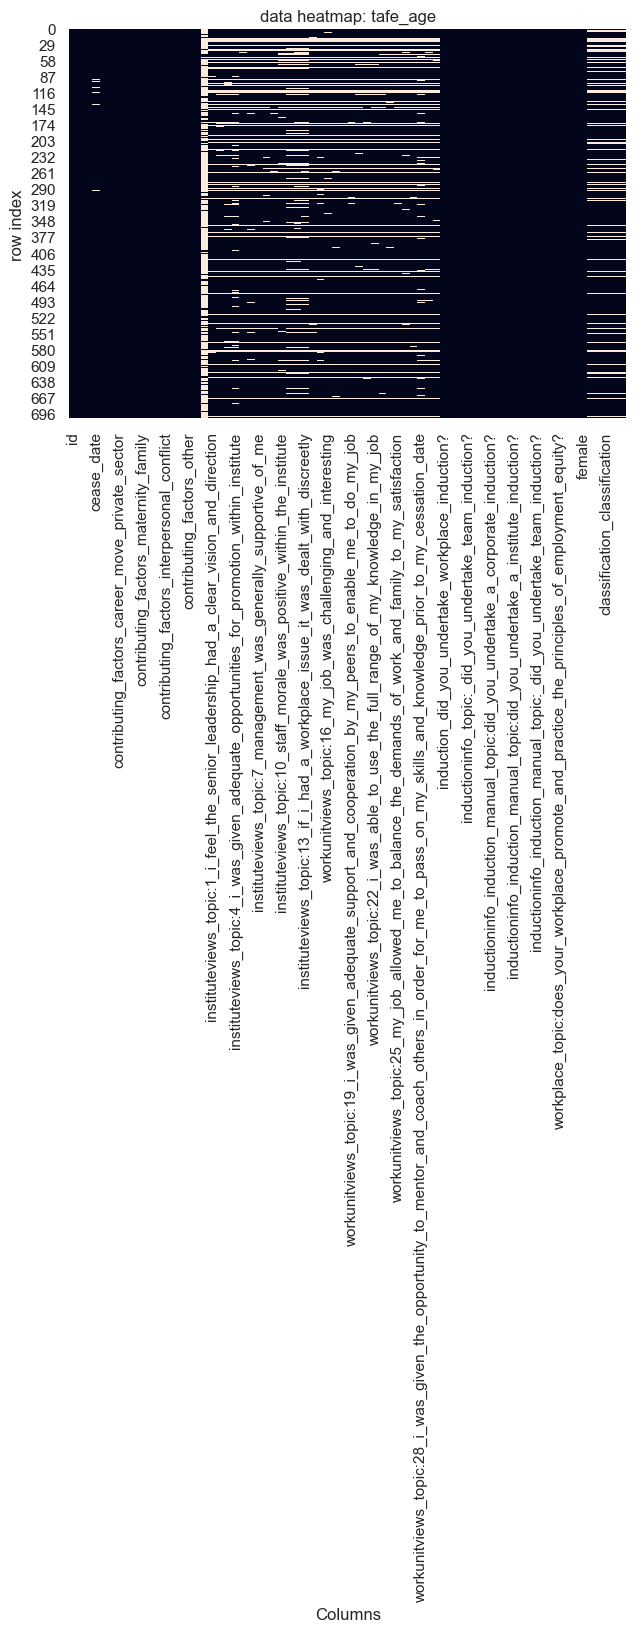

In [60]:
#2 missing values 
sns.heatmap(tafe_age.isnull(), cbar=False)
plt.title('data heatmap: tafe_age')
plt.ylabel('row index')
plt.xlabel('Columns')

Seems wrong. There are NaN values in cells 42, 43, 45, 

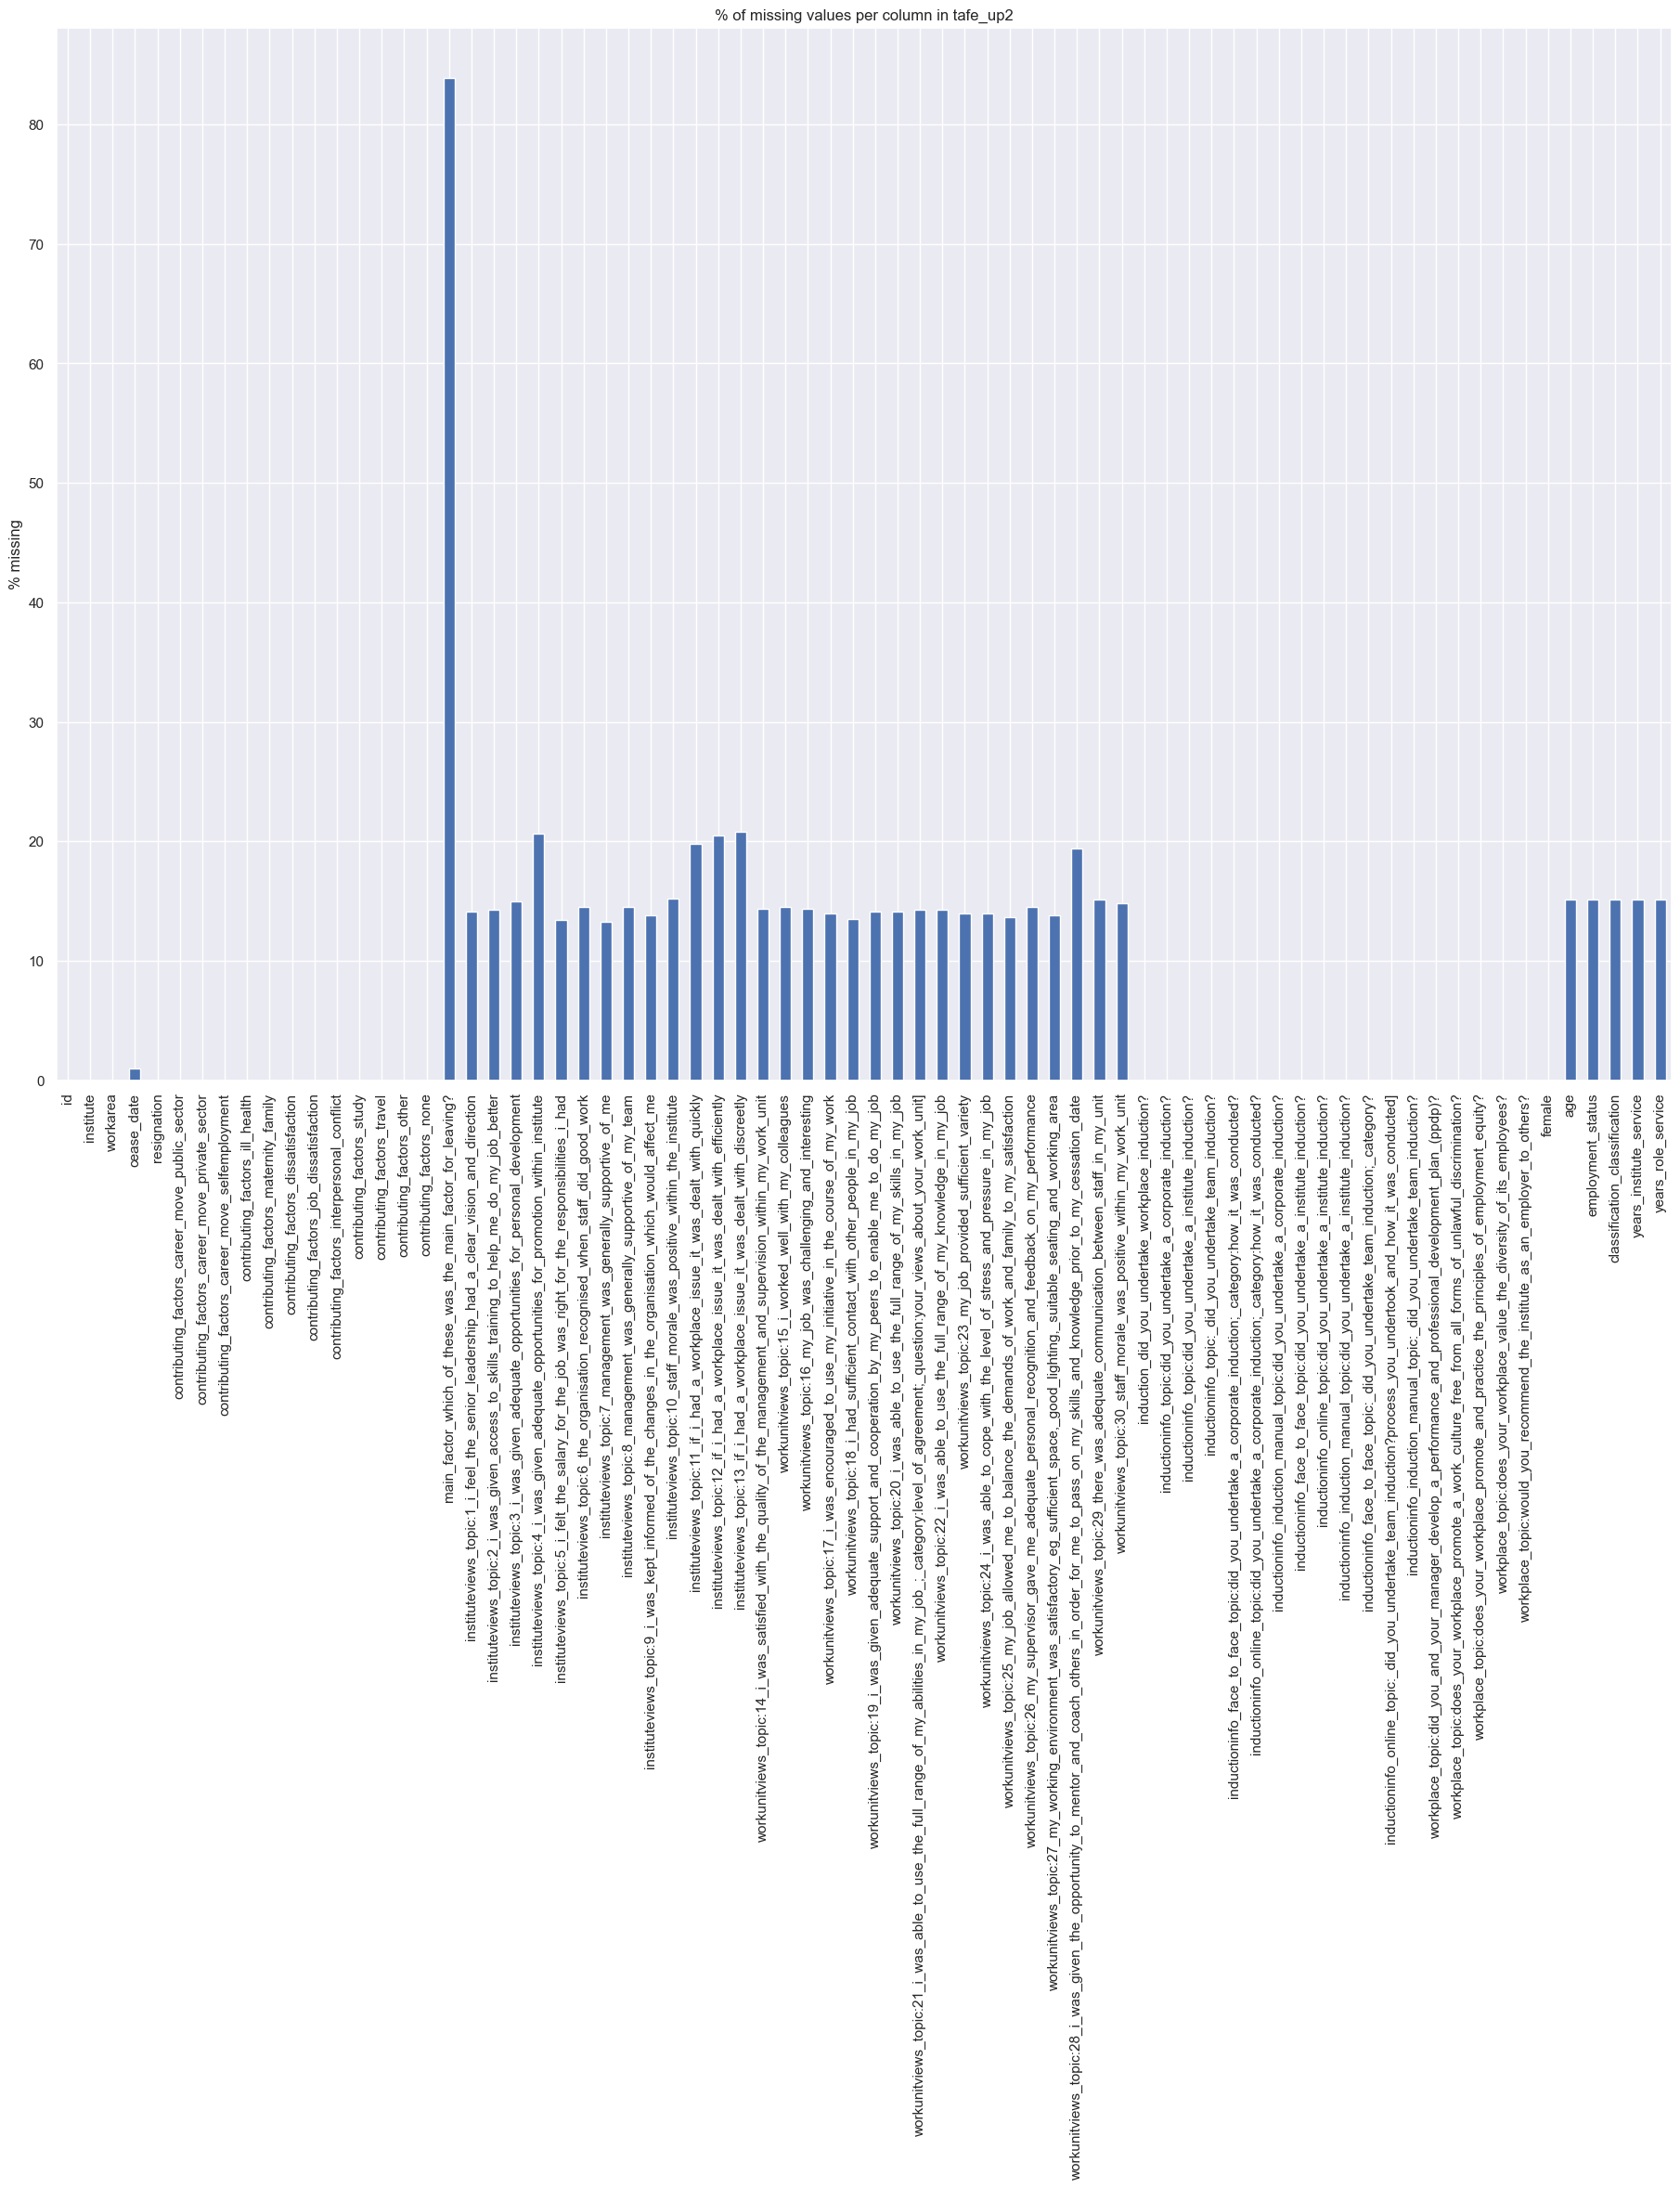

In [61]:
#(2): missing/repeated data
pct_miss=dict()
for c in list(tafe_up2.columns):
    missing = round((tafe_up2[c].isna().sum())/(len(tafe_up2))*100, 2)
    #print(c+': ' + str(missing))
    pct_miss[c]=missing
    
missing_series = pd.Series(pct_miss)
missing_series.plot.bar(figsize=(20,14), rot=90)
plt.title('% of missing values per column in tafe_up2')
plt.ylabel('% missing')
plt.show()

We can drop column 17, as it still has a lot of missing data.

In [62]:
tafe_final=tafe_age.drop(['main_factor_which_of_these_was_the_main_factor_for_leaving?'], axis=1)
tafe_final.describe(include='all')

,id,institute,workarea,cease_date,resignation,contributing_factors_career_move_public_sector,contributing_factors_career_move_private_sector,contributing_factors_career_move_selfemployment,contributing_factors_ill_health,contributing_factors_maternity_family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,instituteviews_topic:1_i_feel_the_senior_leadership_had_a_clear_vision_and_direction,instituteviews_topic:2_i_was_given_access_to_skills_training_to_help_me_do_my_job_better,instituteviews_topic:3_i_was_given_adequate_opportunities_for_personal_development,instituteviews_topic:4_i_was_given_adequate_opportunities_for_promotion_within_institute,instituteviews_topic:5_i_felt_the_salary_for_the_job_was_right_for_the_responsibilities_i_had,instituteviews_topic:6_the_organisation_recognised_when_staff_did_good_work,instituteviews_topic:7_management_was_generally_supportive_of_me,instituteviews_topic:8_management_was_generally_supportive_of_my_team,instituteviews_topic:9_i_was_kept_informed_of_the_changes_in_the_organisation_which_would_affect_me,instituteviews_topic:10_staff_morale_was_positive_within_the_institute,instituteviews_topic:11_if_i_had_a_workplace_issue_it_was_dealt_with_quickly,instituteviews_topic:12_if_i_had_a_workplace_issue_it_was_dealt_with_efficiently,instituteviews_topic:13_if_i_had_a_workplace_issue_it_was_dealt_with_discreetly,workunitviews_topic:14_i_was_satisfied_with_the_quality_of_the_management_and_supervision_within_my_work_unit,workunitviews_topic:15_i_worked_well_with_my_colleagues,workunitviews_topic:16_my_job_was_challenging_and_interesting,workunitviews_topic:17_i_was_encouraged_to_use_my_initiative_in_the_course_of_my_work,workunitviews_topic:18_i_had_sufficient_contact_with_other_people_in_my_job,workunitviews_topic:19_i_was_given_adequate_support_and_cooperation_by_my_peers_to_enable_me_to_do_my_job,workunitviews_topic:20_i_was_able_to_use_the_full_range_of_my_skills_in_my_job,workunitviews_topic:21_i_was_able_to_use_the_full_range_of_my_abilities_in_my_job_;_category:level_of_agreement;_question:your_views_about_your_work_unit],workunitviews_topic:22_i_was_able_to_use_the_full_range_of_my_knowledge_in_my_job,workunitviews_topic:23_my_job_provided_sufficient_variety,workunitviews_topic:24_i_was_able_to_cope_with_the_level_of_stress_and_pressure_in_my_job,workunitviews_topic:25_my_job_allowed_me_to_balance_the_demands_of_work_and_family_to_my_satisfaction,workunitviews_topic:26_my_supervisor_gave_me_adequate_personal_recognition_and_feedback_on_my_performance,"workunitviews_topic:27_my_working_environment_was_satisfactory_eg_sufficient_space,_good_lighting,_suitable_seating_and_working_area",workunitviews_topic:28_i_was_given_the_opportunity_to_mentor_and_coach_others_in_order_for_me_to_pass_on_my_skills_and_knowledge_prior_to_my_cessation_date,workunitviews_topic:29_there_was_adequate_communication_between_staff_in_my_unit,workunitviews_topic:30_staff_morale_was_positive_within_my_work_unit,induction_did_you_undertake_workplace_induction?,inductioninfo_topic:did_you_undertake_a_corporate_induction?,inductioninfo_topic:did_you_undertake_a_institute_induction?,inductioninfo_topic:_did_you_undertake_team_induction?,inductioninfo_face_to_face_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo_online_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo_induction_manual_topic:did_you_undertake_a_corporate_induction?,inductioninfo_face_to_face_topic:did_you_undertake_a_institute_induction?,inductioninfo_online_topic:did_you_undertake_a_institute_induction?,inductioninfo_induction_manual_topic:did_you_undertake_a_institute_induction?,inductioninfo_face_to_face_topic:_did_you_undertake_team_induction;_category?,inductioninfo_online_topic:_did_you_

In [63]:
tafe_resign = (tafe_final[tafe_final['resignation']==True]).copy()
factors_dict = {'contributing_factors_career_move_public_sector':'cf_move_public',
 'contributing_factors_career_move_private_sector':'cf_move_private',
 'contributing_factors_career_move_selfemployment':'cf_move_self',
 'contributing_factors_ill_health':'cf_ill',
 'contributing_factors_maternity_family': 'cf_mater/fam',
 'contributing_factors_dissatisfaction': 'cf_dissatisf',
 'contributing_factors_job_dissatisfaction': 'cf_job_dissatif',
 'contributing_factors_interpersonal_conflict': 'cf_interp_conflict',
 'contributing_factors_study':'cf_study',
 'contributing_factors_travel': 'cf_travel',
 'contributing_factors_other': 'cf_other',
 'contributing_factors_none': 'cf_none'}

factors = ['cf_move_public',
 'cf_move_private',
 'cf_move_self',
 'cf_ill',
 'cf_mater/fam',
  'cf_dissatisf',
  'cf_job_dissatif',
  'cf_interp_conflict',
 'cf_study',
  'cf_travel',
          'cf_other']
    
tafe_resign.rename(factors_dict, axis=1, inplace=True)

tafe_resign_factors = tafe_resign.iloc[:, [3,5,6,7,8,9,10,11,12,13,14,15,16,66,69]]
tafe_resign_factors

,cease_date,cf_move_public,cf_move_private,cf_move_self,cf_ill,cf_mater/fam,cf_dissatisf,cf_job_dissatif,cf_interp_conflict,cf_study,cf_travel,cf_other,cf_none,age,years_institute_service
3,2010.0,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN
4,2010.0,False,True,False,False,False,False,False,False,False,False,False,False,43.0,3.0
5,2010.0,False,False,False,False,False,False,False,False,False,False,True,False,56.0,7.0
6,2010.0,False,True,False,False,True,False,False,False,False,False,True,False,20.0,3.0
7,2010.0,False,False,False,False,False,False,False,False,False,False,True,False,48.0,3.0
8,2009.0,False,False,False,False,False,False,False,False,False,False,True,False,38.0,3.0
9,2010.0,True,False,False,False,False,False,False,False,False,False,True,False,23.0,1.0
10,2010.0,True,False,False,False,False,False,False,False,False,False,False,False,43.0,0.0
13,2010.0,False,True,False,False,False,False,False,False,False,False,False,False,33.0,11.0
14,2010.0,False,True,False,False,False,True,True,False,False,False,False,False,33.0,7.0


## 6. Data Visualization and Analysis<a name="section6"></a>

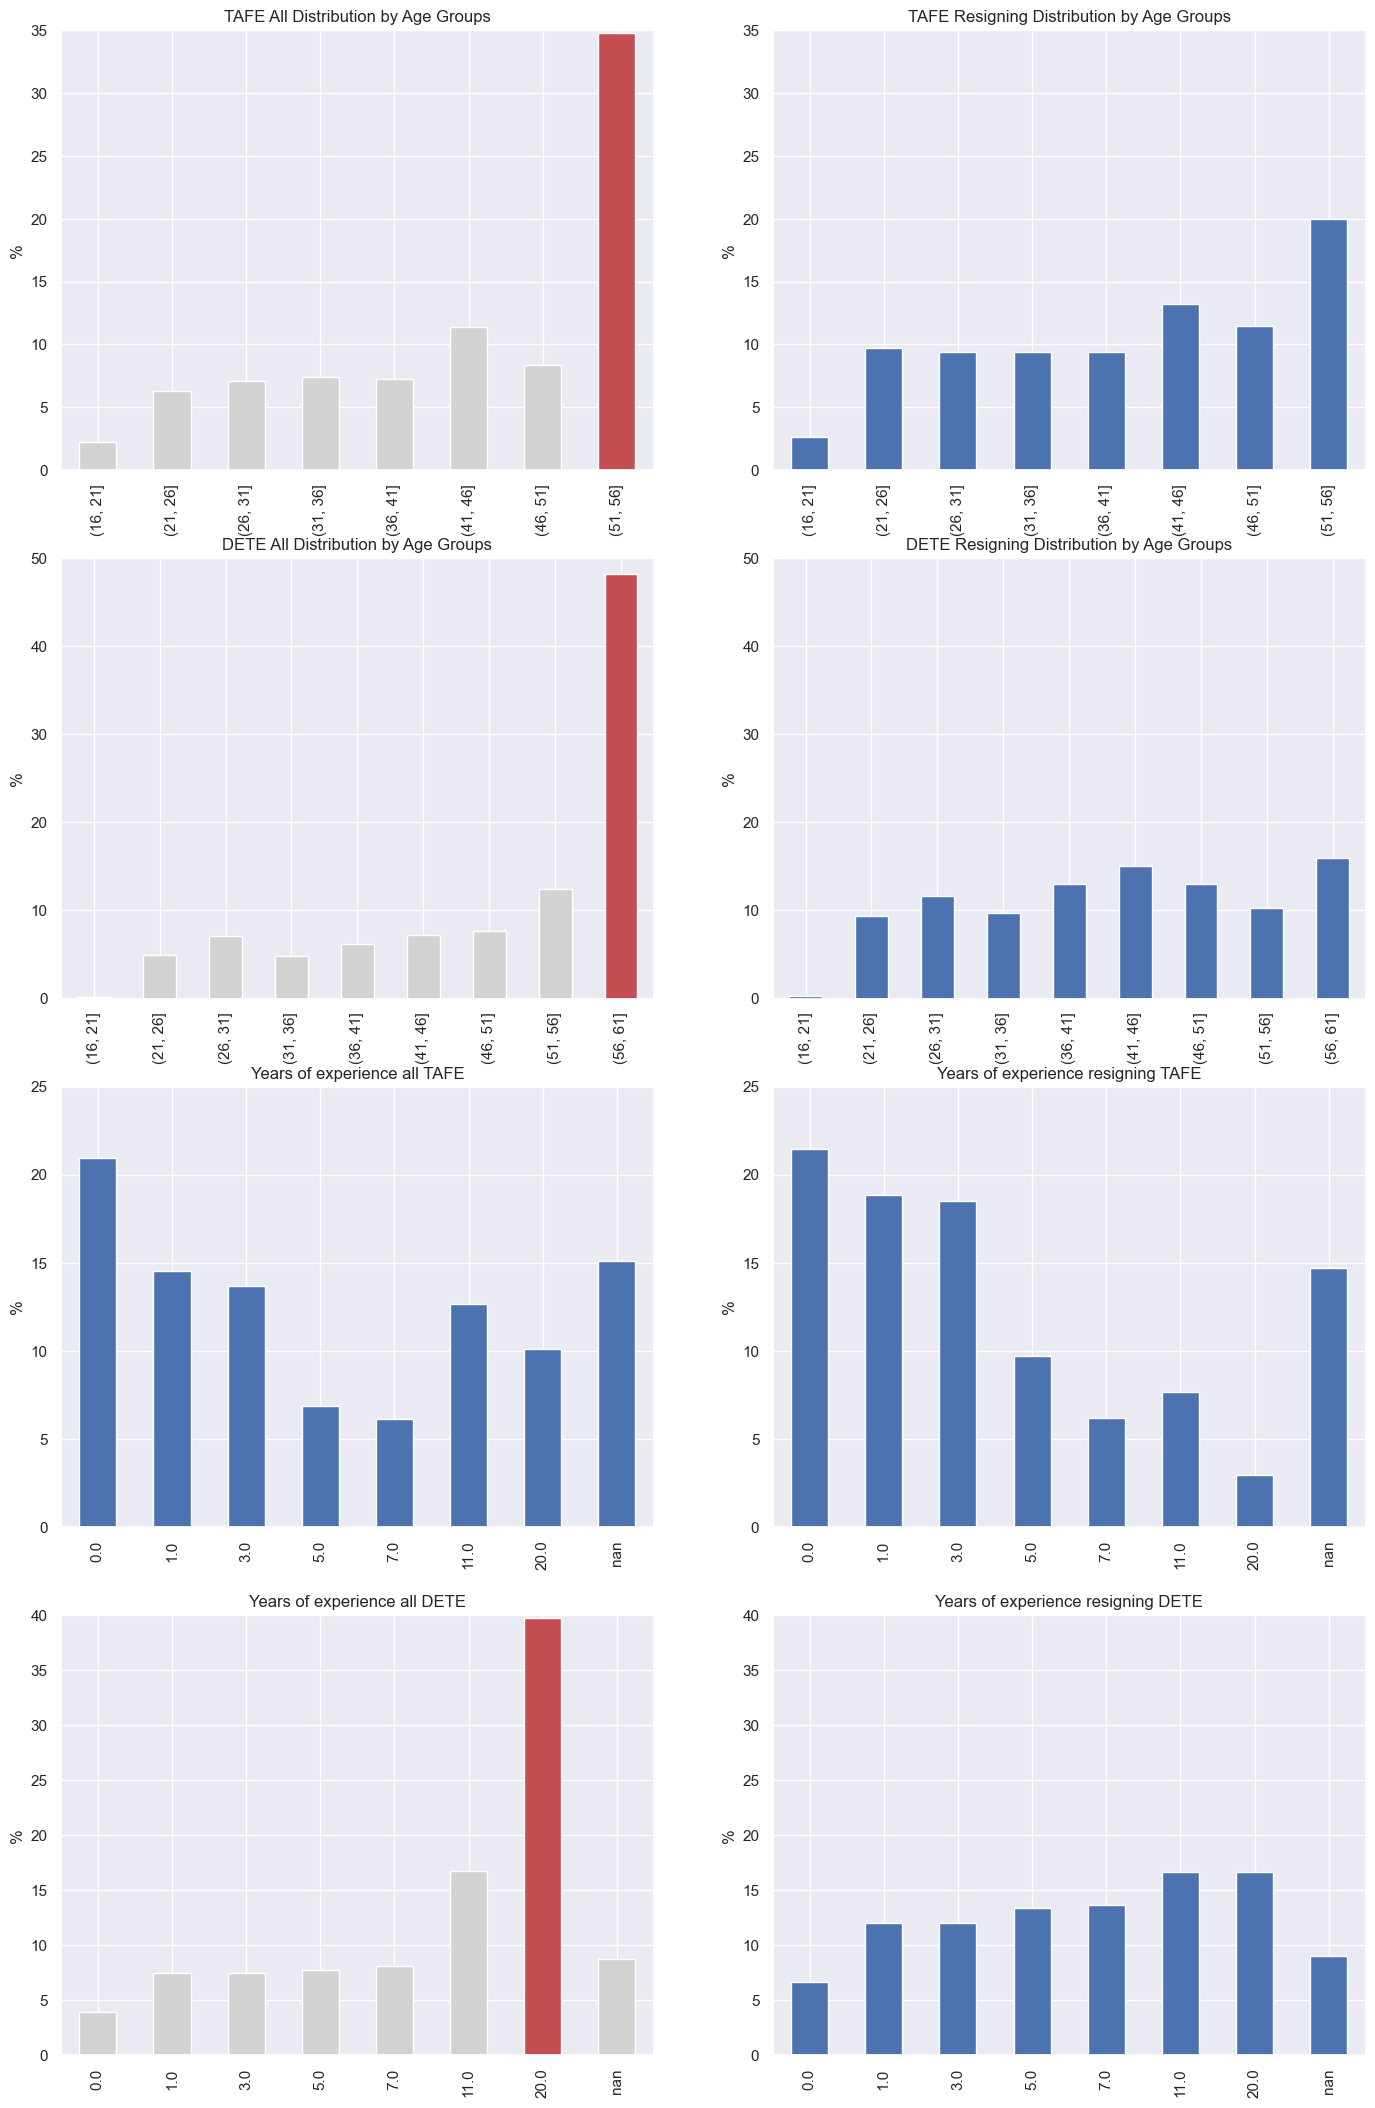

In [64]:
ages_tafe = pd.interval_range(start=16, end=60, freq = 5)
ages_dete = pd.interval_range(start=16, end=65, freq = 5)

plt.figure(figsize=(15,25))

plt.subplot(421)
((tafe_final['age'].value_counts(normalize=True, bins = ages_tafe))*100).sort_index().plot.bar(color=['lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','r'])
plt.title("TAFE All Distribution by Age Groups")
plt.ylim([0,35])
plt.ylabel('%')

plt.subplot(422)
((tafe_resign_factors['age'].value_counts(normalize=True, bins = ages_tafe))*100).sort_index().plot.bar()
plt.title("TAFE Resigning Distribution by Age Groups")
plt.ylim([0,35])
plt.ylabel('%')

plt.subplot(423)
((dete_final['age'].value_counts(normalize=True, bins = ages_dete))*100).sort_index().plot.bar(color=['lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','r'])
plt.title('DETE All Distribution by Age Groups')
plt.ylim([0,50])
plt.ylabel('%')

plt.subplot(424)
((dete_resign_factors['age'].value_counts(normalize=True, bins = ages_dete))*100).sort_index().plot.bar()
plt.title("DETE Resigning Distribution by Age Groups")
plt.ylim([0,50])
plt.ylabel('%')

plt.subplot(425)
((tafe_final['years_institute_service'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar()
plt.title('Years of experience all TAFE')
plt.ylim([0,25])
plt.ylabel('%')

plt.subplot(426)
((tafe_resign_factors['years_institute_service'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar()
plt.title('Years of experience resigning TAFE')
plt.ylim([0,25])
plt.ylabel('%')

plt.subplot(427)
((dete_final['years_institute_service'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar(color=['lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','r','lightgray'])
plt.title('Years of experience all DETE')
plt.ylim([0,40])
plt.ylabel('%')

plt.subplot(428)
((dete_resign_factors['years_institute_service'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar()
plt.title('Years of experience resigning DETE')
plt.ylim([0,40])
plt.ylabel('%')


plt.show()


We can see from the start how age and seniority compare in each institution between all employees and resigning ones:

* Tafe's staff is concentrated in older folks (55% > 41, 35%> 51), which reflects in the resigning groups, although this disparity is much smaller (45% > 41);

* Dete's staff is even more concentrated (60% >50),but the age when resigning is fairly distributed (all groups range from 9 - 16%, except 16-21, which is a rare exception in the institute population.

* Analysing TAFE's experience distribution, +10 years employees are less likely to resign, while greener ones tend to do it more frequently than their representation in the population. This holds true only to +20 years employees at DETE.

It's worth looking at the resignation dates to check for any patterns.

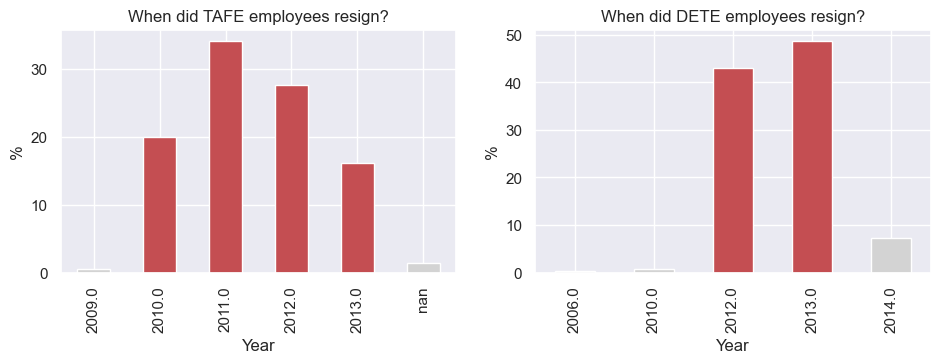

In [65]:
plt.figure(figsize=(10,3))
plt.subplot(121)
((tafe_resign_factors['cease_date'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar(color=['lightgray','r','r','r','r','lightgray'])
plt.title('When did TAFE employees resign?')
plt.ylabel('%')
plt.xlabel('Year')

plt.subplot(122)
((dete_resign_factors['cease_date'].value_counts(normalize=True, dropna=False))*100).sort_index().plot.bar(color=['lightgray','lightgray','r','r','lightgray'])
plt.title('When did DETE employees resign?')
plt.ylabel('%')
plt.xlabel('Year')

plt.show()

At TAFE, resignations span only five years, and they are somewhat evenly split between 2010 and 2013. In DETE, on the other hand, over 90% of resignations took place between 2012 and 2013, despite ranging at least 8 years. This indicates a brupt, punctual change of policy inside the company might have led to these outcomes.

Next, we can group our data by age group, and then calculate how much each issue might have influenced their resignations.

In [66]:
list(tafe_resign_factors.columns)

['cease_date',
 'cf_move_public',
 'cf_move_private',
 'cf_move_self',
 'cf_ill',
 'cf_mater/fam',
 'cf_dissatisf',
 'cf_job_dissatif',
 'cf_interp_conflict',
 'cf_study',
 'cf_travel',
 'cf_other',
 'cf_none',
 'age',
 'years_institute_service']

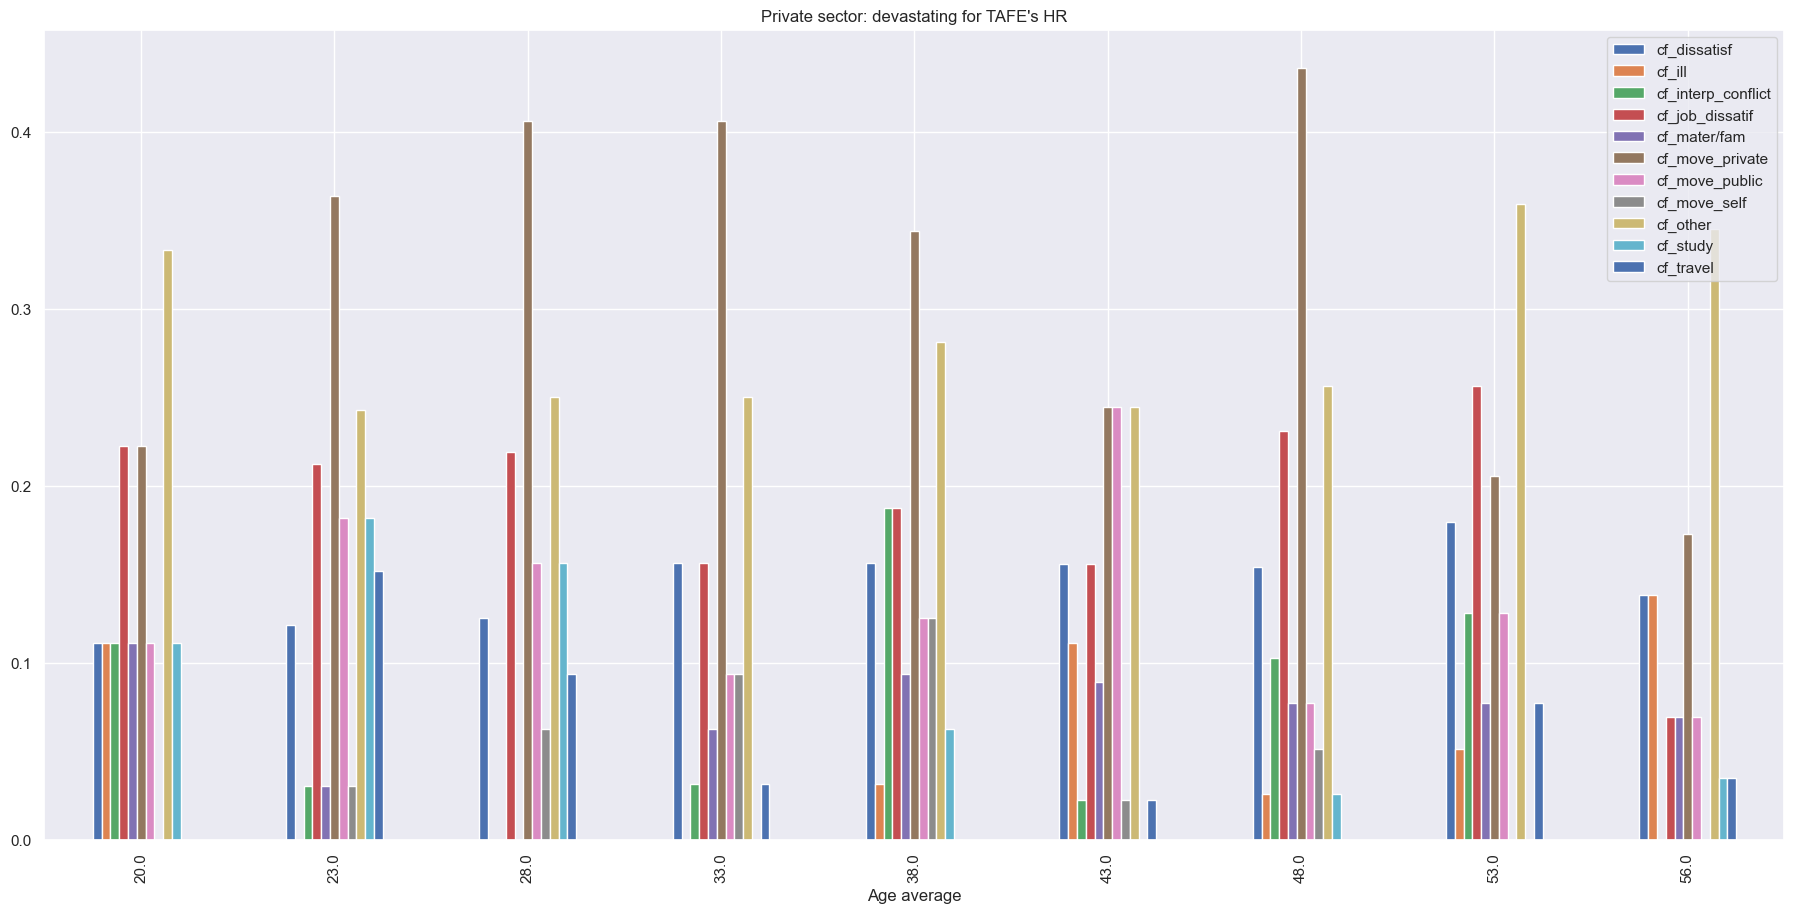

In [67]:
#tafe -> 61:66 False is the problem; 5:17 True is the problem, #18:48 False is problem

tafe_factors = tafe_resign_factors.pivot_table(factors, 'age', aggfunc=np.mean)
tafe_factors.reset_index(inplace=True)
tafe_factors.plot(x='age', kind='bar', figsize=(20,10))
plt.title("Private sector: devastating for TAFE's HR")
plt.xlabel('Age average')
plt.show()
# tafe_factors.plot(x='age', kind='bar')

* The leading contributing factor to resignation between all age groups within 21-51 years of age is moving to the private sector. It accounts for between 25%-43%, and still around 20% for the youngest and oldest groups;
* Job dissatisfaction is also a constant top 3 of mind in basically all ages, ranging from 15%-25%;
* Unusually high markers are shown for interpersonal conflicts for ages 36-40 at 18% of resignations, while a public career move has been alleged by 24% of employees averaging 43 years of age.

In [68]:
dete_resign.columns

Index(['id', 'resignation', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'region', 'employment_status', 'cf_move_public',
       'cf_move_private', 'cf_interp_conflicts', 'cf_job_dissatif',
       'cf_depart_dissatif', 'cf_work_env_dissatif', 'cf_no_recognition',
       'cf_no_job_sec', 'cf_bad_location', 'cf_dissatif', 'cf_mater/fam',
       'cf_relocation', 'cf_study_travel', 'cf_ill', 'cf_trauma', 'cf_balance',
       'cf_workload', 'cf_none_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'information',
       'kept_informed', 'wellness_programs', 'health_&_safety', 'female',
       'age', 'aboriginal', 'torres_strait', 'south_sea', 'disability',

In [69]:
factors_dete = list(dete_resign_factors.columns)[1:19]
factors_dete

['cf_move_public',
 'cf_move_private',
 'cf_interp_conflicts',
 'cf_job_dissatif',
 'cf_depart_dissatif',
 'cf_work_env_dissatif',
 'cf_no_recognition',
 'cf_no_job_sec',
 'cf_bad_location',
 'cf_dissatif',
 'cf_mater/fam',
 'cf_relocation',
 'cf_study_travel',
 'cf_ill',
 'cf_trauma',
 'cf_balance',
 'cf_workload',
 'cf_none_above']

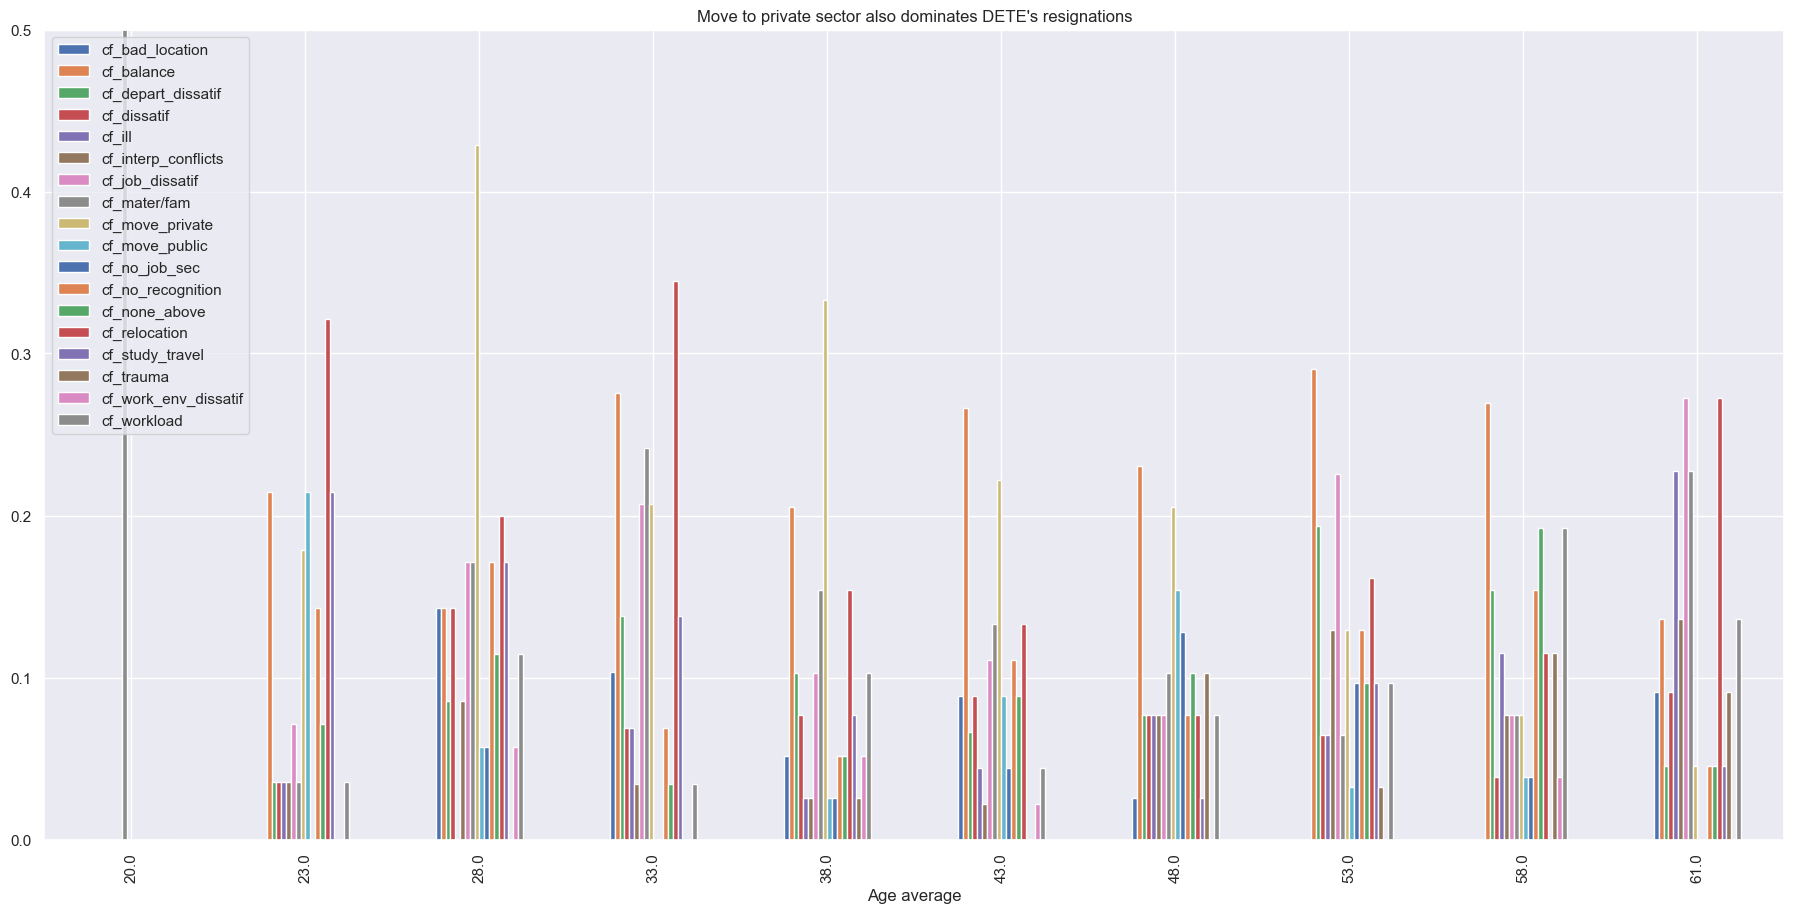

In [70]:
#dete -> 8:26 True is the problem; 5:17 True is the problem, #18:48 False is problem

dete_factors = dete_resign_factors.pivot_table(factors_dete, 'age', aggfunc=np.mean)
dete_factors.reset_index(inplace=True)
dete_factors.plot(x='age', kind='bar', figsize=(20,10))
plt.ylim([0,0.50])
plt.title("Move to private sector also dominates DETE's resignations")
plt.xlabel('Age average')
plt.show()
# tafe_factors.plot(x='age', kind='bar')

For DETE the questionary was more thorough, and we get a different perspective as a result. 

* A career move to the private sector is dominant between 26-30(42%), and persistently tops the charts from there until 51(20-33%).
* Relocation is the top issue for 23(32%), 33 (35%) and 61 years (27%) of age ranges, and a top issue in other groups as well, always +10%.
* The ages up to 20 are represented by one person only, therefore, the complain is 100% (workload);
* Work-life balance is another champion in this survey, top-of-mind between 21-25 and leading all age groups between 41-60 years, always in the +20%. The only exception is the age range between 26-30, maybe because as recent grads they are expecting more work, and at the same time, they are not given much, considering their experience.

Now, let's see how both institutes perform according to experience, rather than age, for the various contributing factors, starting with TAFE:

Text(0.5, 0, 'Average Institute Experience (years)')

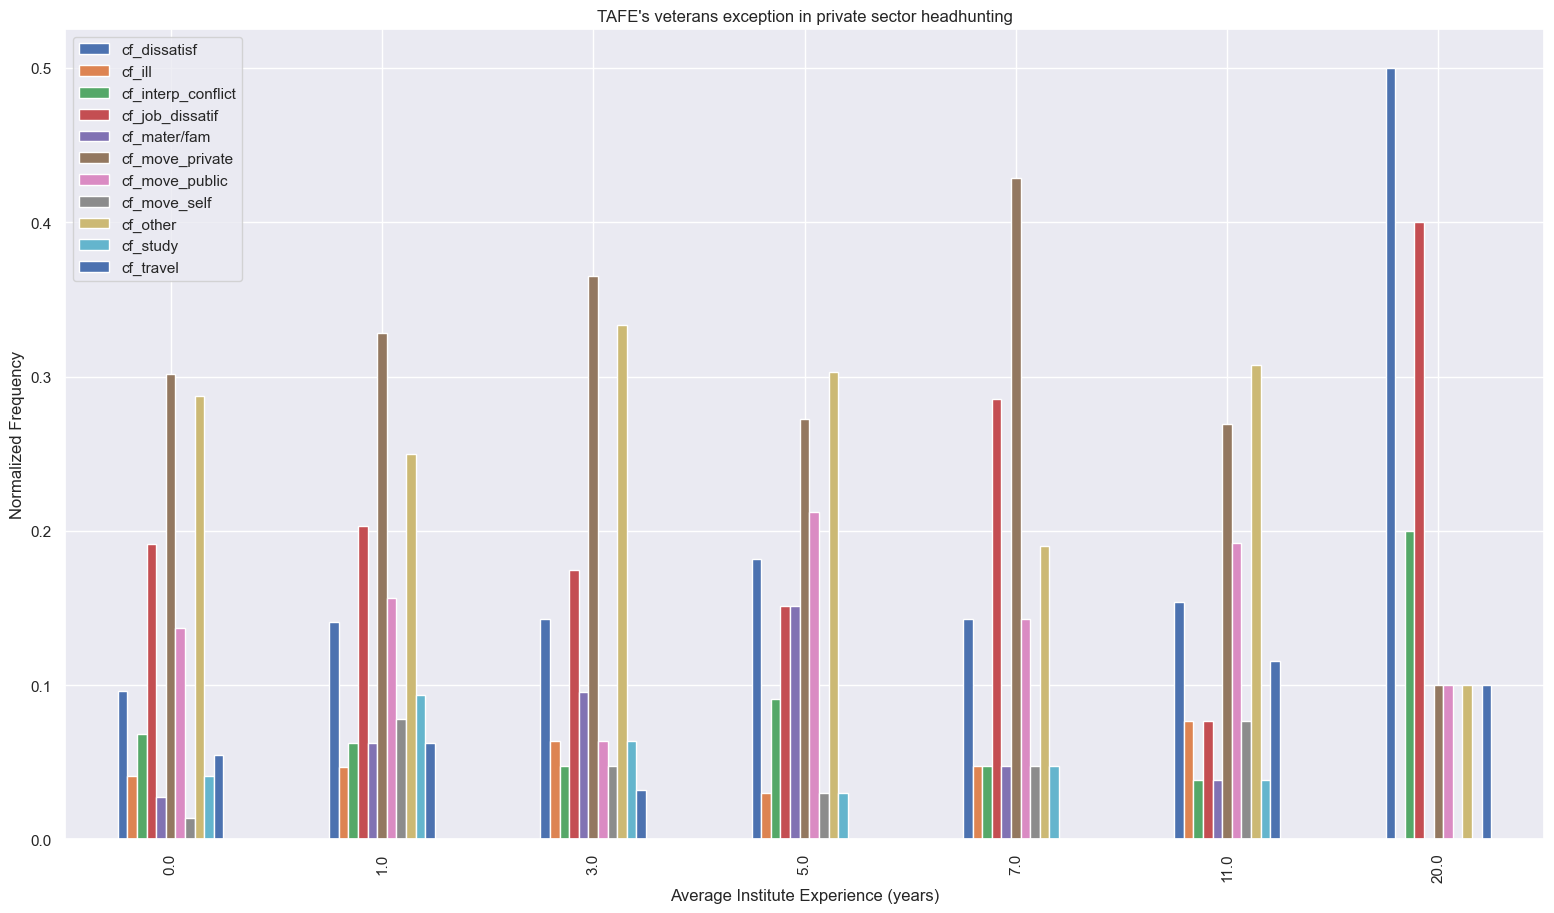

In [71]:
#tafe_resign.rename(factors_dict, axis=1, inplace=True)
tafe_factors = tafe_resign_factors.pivot_table(factors, 'years_institute_service', aggfunc=np.mean)
tafe_factors.reset_index(inplace=True)
tafe_factors.plot(x='years_institute_service', kind='bar', figsize=(17,10))
plt.title("TAFE's veterans exception in private sector headhunting")
plt.ylabel('Normalized Frequency')
plt.xlabel('Average Institute Experience (years)')

* Most remarkably, TAFE's personnel is recurrently resigning due to moves to the private sector, by 27%-43% of the cases except when exceptionally veterans (+20 years of xp);
* Job dissatisfaction shows up at second in most experience groups, usually ranging from 17%-24%(exception made to the more ripe groups, where it averages 8% and 40%, respectively).
* Move to the public sector and overall dissatisfaction close the general top 4. It is interesting to notice, however, that in-house veterans have a different pattern compared to the rest: they mostly resign due to overall dissatisfaction, job dissatisfaction and interpersonal conflicts. That, aligned with the fact that career moves to the private sector tops the charts, may indicate in the end that routine pays a toll on these work environments.

Now, for DETE:

Text(0.5, 0, 'Average Institute experience (years)')

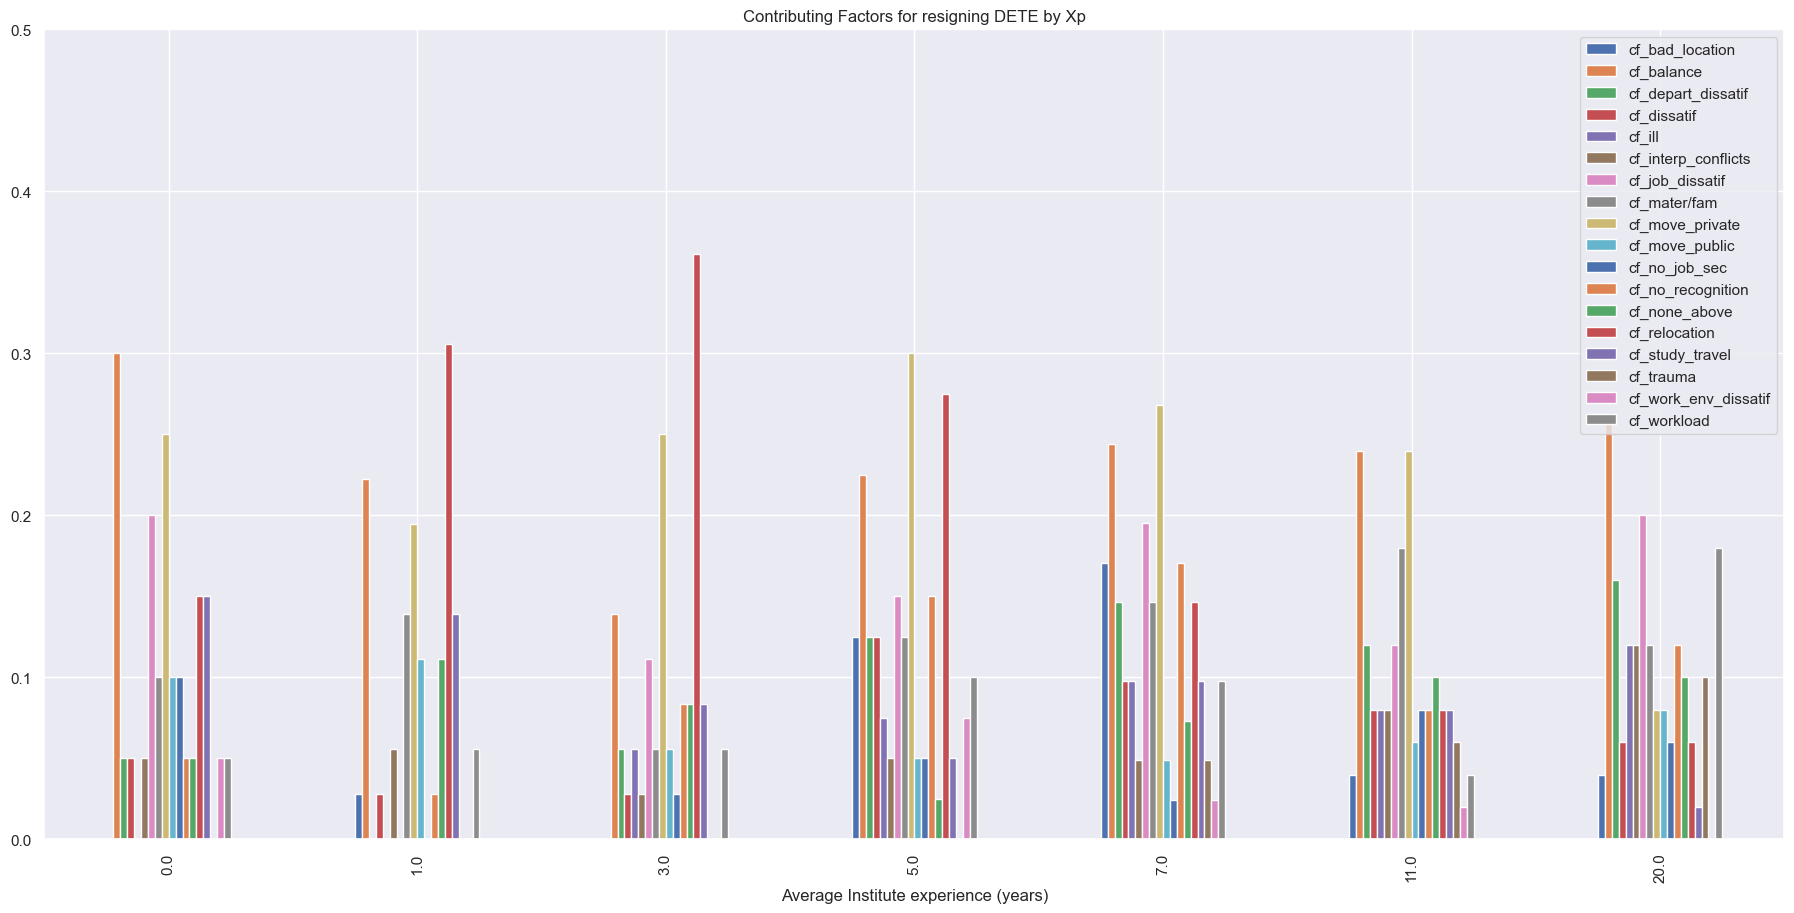

In [72]:
dete_factors = dete_resign_factors.pivot_table(factors_dete, 'years_institute_service', aggfunc=np.mean)
dete_factors.reset_index(inplace=True)
dete_factors.plot(x='years_institute_service', kind='bar', figsize=(20,10))
plt.ylim([0,0.50])
plt.title('Contributing Factors for resigning DETE by Xp')
plt.xlabel("Average Institute experience (years)")

* Looking at DETE employees through the experience prisma, we can see that the predominant contributing factors are work-life balance (15%-30%) and moving to a private career, ranging between 19-30% except for very experienced folks (+20y) at 8%.

* Relocation seems to be a big problem in the first 6 years in the institute, responding for 15%-35% of resignations.

* Except for the 1-2 years of experience group, job dissatisfaction is also a sad highlight in this chart, present between 10%-20% fo resignations.

* starting at 4 years of experience, department dissatisfactions sets in for 12-16% of resignations.

* Maternity/ family reasons are on the rise between the groups of 5 and 11 years of experience. Interestingly, it rises along with the bad location complaint, so maybe the surroundings/infrastructure plays a role when planning to start a family for these employees.

## 7. Conclusion<a name="section7"></a>

In this project, we managed to dig through 2 datasets of australian institutes to compare the different driving factors behind resignations considering groupings based on age and experience. Initial analysis found that:


* Tafe's staff is concentrated in older folks (55% > 41yo, 35%> 51yo), as in the resigning group (45% > 41);
* Bigger disparity in Dete's staff (60% >50),resigning age distributed (all groups range from 9 - 16%);
* At TAFE, +10 years of experience are less likely to resign, while greener are overrepreented. At DETE, only +20 years less likely to resign.
* staff resignations are concentrated in small periods of less than 10 years in each institute, showing that a change in policy might be to blame.



Our main findings were:

<table ><tr><th > by/dataset <th><th> TAFE <th> DETE<tr><tr>
<tr><td> AGE <td><td> Leading factor: move to private sector (15%-43%); 
    also: job dissatisfaction (10%-20%); 
    high inter-confl at 37 18%; 
    high public move at 43 24%. <td><td>Main: move to private main cause for 26-50 (20%-42%);
    relocation always a main concern, top issue for 23, 33, and 61yo (27%-35%); 
    work-life balance: most important 41-60, in tops-of-mind for 23yo (always +20%)<td><tr><tr>
<tr><td> XP <td><td>Leading factor: move to private, 27%-43%;
    2nd most important: job dissatisfaction 17%-24%; 
    move to public career and dissatisfaction make the top 4.<td><td>Most important: work-life balance(15%-30%), move to private sector (8%-30%);
    relocation is a big problem in the first 6 years (15%-35%);
    job dissatisfaction also high in the charts (10-20%), except for the 1-2 years group;<td><tr><table>


Next steps:
* Investigate secondary motifs behind staff resignation: we could include the 'agree' columns, for instance.
* Investigate resignations by gender.